<a href="https://colab.research.google.com/github/neylinsomne/ONU_SONDER/blob/main/SONDER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga

In [230]:
import pandas as pd
import os
import json
import pandas as pd
import geopandas as gpd

In [231]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [232]:
!ls drive/MyDrive/Medellin/archivos/


atractivos_turisticos.geojson	     medellin_casas_venta.geojson
centros_comerciales		     medellin.geojson.txt
cuerpos_de_agua_de_refere.geojson    pa_brincar
drogueria.geojson		     pot48_2014_plantas_de_pot.geojson
ecoparques.geojson		     pot48_2014_red_hidrica_.geojson
esperanza_de_vida.geojson	     poverty_index.geojson
fuentes_semilleras.geojson	     producto_interno_bruto.geojson
hoteles_2.geojson		     restaurantes_and_cafes.geojson
indice_desarrollo_humano.geojson     tasa_de_desempleo.geojson
inseguridad_alimentaria.geojson      tiendas.geojson
medellin_apartamentos_venta.geojson  universidades.geojson


In [233]:


# # Ruta de la carpeta que contiene los archivos
# folder_path = "/content/drive/MyDrive/Medellin/archivos"

# # Diccionario para almacenar los DataFrames
# dataframes = {}

# def load_json_files(folder_path):
#     for filename in os.listdir(folder_path):
#         file_path = os.path.join(folder_path, filename)

#         try:
#             # Si el archivo es JSON
#             if filename.endswith(".json"):
#                 with open(file_path, 'r', encoding='utf-8') as file:
#                     data = json.load(file)

#                 # Intentar convertir en DataFrame, si es posible
#                 if isinstance(data, list):
#                     df = pd.DataFrame(data)
#                 elif isinstance(data, dict):
#                     df = pd.json_normalize(data)
#                 else:
#                     print(f"{filename} tiene un formato no compatible y no se puede cargar como DataFrame.")
#                     continue

#                 # Verificar si el DataFrame tiene una columna 'features' que contiene una lista de diccionarios
#                 if 'features' in df.columns and isinstance(df['features'][0], list):
#                     # Expandir la columna 'features' para que cada elemento sea una fila
#                     df = pd.json_normalize(df['features'][0])

#                 # Guardar el DataFrame en el diccionario
#                 dataframes[filename] = df
#                 print(f"{filename} cargado y expandido en DataFrame.")

#             # Si el archivo es GeoJSON
#             elif filename.endswith(".geojson"):
#                 gdf = gpd.read_file(file_path)
#                 dataframes[filename] = gdf
#                 print(f"{filename} cargado en GeoDataFrame.")

#         except Exception as e:
#             print(f"Error al cargar {filename}: {e}")

#     return dataframes

# # Cargar todos los archivos en DataFrames
# dataframes = load_json_files(folder_path)

# Ahora cada archivo está cargado en el diccionario `dataframes` con su nombre como clave


In [234]:
folder_path = "/content/drive/MyDrive/Medellin/archivos"
for nombre_archivo in os.listdir(folder_path):
    # Si el archivo tiene la extensión '.json' y no '.geojson'
    if nombre_archivo.endswith('.json') and not nombre_archivo.endswith('.geojson'):
        # Definir la ruta completa del archivo antiguo y del nuevo
        ruta_vieja = os.path.join(folder_path, nombre_archivo)
        ruta_nueva = os.path.join(folder_path, nombre_archivo.replace('.json', '.geojson'))

        # Renombrar el archivo
        os.rename(ruta_vieja, ruta_nueva)
        print(f"Cambiado: {ruta_vieja} a {ruta_nueva}")

In [235]:
import os
import json
import pandas as pd
import geopandas as gpd

# Directorio donde están tus archivos


# Diccionario para almacenar los DataFrames
dataframes = {}

def load_files(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        try:
            # Intentar abrir el archivo y cargarlo como JSON/GeoJSON
            with open(file_path, 'r', encoding='utf-8') as file:
                data = file.read()

                # Intentar cargar como JSON
                try:
                    data_json = json.loads(data)

                    # Si es GeoJSON, cargar como GeoDataFrame
                    if 'features' in data_json and isinstance(data_json['features'], list):
                        gdf = gpd.GeoDataFrame.from_features(data_json["features"])
                        dataframes[filename] = gdf
                        print(f"{filename} cargado como GeoDataFrame.")

                    # Si es JSON regular, cargar como DataFrame
                    else:
                        if isinstance(data_json, list):
                            df = pd.DataFrame(data_json)
                        elif isinstance(data_json, dict):
                            df = pd.json_normalize(data_json)
                        else:
                            print(f"{filename} tiene un formato no compatible y no se puede cargar.")
                            continue
                        dataframes[filename] = df
                        print(f"{filename} cargado como DataFrame.")

                    continue  # Pasar al siguiente archivo si se pudo cargar como JSON

                except json.JSONDecodeError:
                    # Si no es JSON, intentar cargar como CSV
                    try:
                        df = pd.read_csv(file_path)
                        dataframes[filename] = df
                        print(f"{filename} cargado como CSV en DataFrame.")
                    except pd.errors.ParserError:
                        print(f"{filename} tiene un formato no compatible (no es JSON ni CSV).")

        except Exception as e:
            print(f"Error al cargar {filename}: {e}")

    return dataframes

# Cargar todos los archivos en DataFrames o GeoDataFrames
dataframes = load_files(folder_path)


esperanza_de_vida.geojson cargado como GeoDataFrame.
cuerpos_de_agua_de_refere.geojson cargado como GeoDataFrame.
centros_comerciales cargado como GeoDataFrame.
pot48_2014_red_hidrica_.geojson cargado como GeoDataFrame.
pot48_2014_plantas_de_pot.geojson cargado como GeoDataFrame.
producto_interno_bruto.geojson cargado como GeoDataFrame.
indice_desarrollo_humano.geojson cargado como GeoDataFrame.
inseguridad_alimentaria.geojson cargado como GeoDataFrame.
tasa_de_desempleo.geojson cargado como GeoDataFrame.
universidades.geojson cargado como GeoDataFrame.
restaurantes_and_cafes.geojson cargado como GeoDataFrame.
drogueria.geojson cargado como GeoDataFrame.
medellin_apartamentos_venta.geojson cargado como DataFrame.
medellin_casas_venta.geojson cargado como DataFrame.
poverty_index.geojson cargado como GeoDataFrame.
medellin.geojson.txt cargado como GeoDataFrame.
hoteles_2.geojson cargado como GeoDataFrame.
atractivos_turisticos.geojson cargado como GeoDataFrame.
ecoparques.geojson cargad

In [236]:
import pandas as pd
import unicodedata

# Función para normalizar texto (minúsculas y eliminación de tildes)
def normalize_text(text):
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text

# Función para aplicar la normalización sobre un DataFrame usando pandas
def normalize_dataframe_pandas(df):
    # Selecciona solo las columnas de texto (object) y aplica la normalización a cada elemento
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].apply(lambda x: normalize_text(x) if isinstance(x, str) else x)
    return df


normalized_dataframes = {name: normalize_dataframe_pandas(df.copy()) for name, df in dataframes.items()}

# Imprimir algunos ejemplos de DataFrames normalizados
for name, df in normalized_dataframes.items():
    print(f"DataFrame: {name}")
    sample_size = 10  # Tamaño de muestra deseado
    df_length = len(df)  # Número de elementos en el DataFrame

    # Ajustar el tamaño de la muestra si es mayor que la cantidad de elementos disponibles
    sample_size = min(sample_size, df_length)

    # Tomar la muestra
    sample_df = df.sample(n=sample_size, replace=False)

    # Muestra las primeras filas de cada DataFrame de la muestra seleccionada
display(sample_df)


DataFrame: esperanza_de_vida.geojson
DataFrame: cuerpos_de_agua_de_refere.geojson
DataFrame: centros_comerciales
DataFrame: pot48_2014_red_hidrica_.geojson
DataFrame: pot48_2014_plantas_de_pot.geojson
DataFrame: producto_interno_bruto.geojson
DataFrame: indice_desarrollo_humano.geojson
DataFrame: inseguridad_alimentaria.geojson
DataFrame: tasa_de_desempleo.geojson
DataFrame: universidades.geojson
DataFrame: restaurantes_and_cafes.geojson
DataFrame: drogueria.geojson
DataFrame: medellin_apartamentos_venta.geojson
DataFrame: medellin_casas_venta.geojson
DataFrame: poverty_index.geojson
DataFrame: medellin.geojson.txt
DataFrame: hoteles_2.geojson
DataFrame: atractivos_turisticos.geojson
DataFrame: ecoparques.geojson
DataFrame: fuentes_semilleras.geojson
DataFrame: tiendas.geojson


,geometry,OBJECTID,Direccion,Nombre_Cad,Categoria,Ciudad,Departamen,GlobalID
838,POINT (-75.9145 4.73682),839,"calle 14 con carrera 16, cartago, valle del cauca",ara,supermercado,cartago,valle del cauca,b42ea003-1ebe-4d93-b610-e184e03cd7f5
1281,POINT (-74.06275 4.69138),1282,"carrera 53 102a 77, bogota, d.c",carulla,supermercado,bogota d.c,bogota,7310201a-8591-480d-ad39-d8c0f5936a2b
49,POINT (-74.8119 10.9313),50,"carrera 1 sur 50 158, barranquilla, atlantico",ara,supermercado,barranquilla,atlantico,1b9e5d1e-6dbd-44c3-bc20-4d576a280379
92,POINT (-74.781 10.8703),93,"carrera 25 25 17, malambo, atlantico",ara,supermercado,malambo,atlantico,762e9fe5-7dd7-429f-b89d-e0ad50a627df
825,POINT (-76.5443 3.43787),826,"calle 6 27 44, cali, valle del cauca",ara,supermercado,cali,valle del cauca,1bcd7d3a-702d-4f71-a5de-852b71423f6c
235,POINT (-75.4881 5.40613),236,"carrera 6 7 65, salamina, caldas",ara,supermercado,salamina,caldas,78174161-9b30-4b70-a7d3-579b2dd33c0c
1904,POINT (-74.07979 4.75579),1905,"carrera 92 159a 16, bogota, d.c., cundinamarca",d1,supermercado,"bogota, d.c.",cundinamarca,f79b523a-f62c-436b-b5f6-972d7ceae6ac
433,POINT (-74.1265 4.57258),434,"calle 47 sur 17 20, marco fidel suarez, bogota",ara,supermercado,bogota,cundinamarca,862fedae-4ab0-4e07-88fe-5e33c165f464
1714,POINT (-73.82706 7.04205),1715,"calle 37 62 89, barrancabermeja, santander",d1,supermercado,barrancabermeja,santander,820e93cf-f446-46a7-8425-660b38c968df
1161,POINT (-74.06493 4.64074),1162,"carrera 13 53 98, chapinero central, chapinero...",d1,supermercado,bogota d.c,bogota,e9b7de2a-a99b-4bb6-97ed-72897a88888f


In [237]:
for df_name, df in normalized_dataframes.items():
    print(f"DataFrame: {df_name}")
    print(df.columns)
    print("\n")

DataFrame: esperanza_de_vida.geojson
Index(['geometry', 'OBJECTID', 'codigo', 'nombre', 'total_2018', 'total_2019',
       'total_2020', 'total_2021', 'total_2022', 'total_2023', 'hombres_2018',
       'hombres_2019', 'hombres_2020', 'hombres_2021', 'hombres_2022',
       'hombres_2023', 'mujeres_2018', 'mujeres_2019', 'mujeres_2020',
       'mujeres_2021', 'mujeres_2022', 'mujeres_2023', 'Shape_Length',
       'Shape_Area'],
      dtype='object')


DataFrame: cuerpos_de_agua_de_refere.geojson
Index(['geometry', 'OBJECTID', 'nombre', 'fecha_adopcion',
       'fecha_actualizacion', 'Shape_Length', 'Shape_Area'],
      dtype='object')


DataFrame: centros_comerciales
Index(['geometry', 'OBJECTID', 'Direccion', 'Nombre', 'Ciudad', 'Departamento',
       'Marca'],
      dtype='object')


DataFrame: pot48_2014_red_hidrica_.geojson
Index(['geometry', 'OBJECTID', 'jerarquia', 'nombre', 'Shape_Length'], dtype='object')


DataFrame: pot48_2014_plantas_de_pot.geojson
Index(['geometry', 'OBJECTID

In [238]:
df_comunas=dataframes["medellin.geojson.txt"]
del dataframes['medellin.geojson.txt']


In [239]:
gdf_comunas = gpd.GeoDataFrame(df_comunas, geometry='geometry', crs="EPSG:4326")
gdf_comunas

,geometry,OBJECTID,CODIGO,NOMBRE,IDENTIFICACION,LIMITEMUNICIPIOID,SUBTIPO_COMUNACORREGIMIENTO,LINK_DOCUMENTO,SHAPEAREA,SHAPELEN
0,"POLYGON ((-75.54803 6.30436, -75.54812 6.30435...",321,01,Popular,Comuna 1,001,1,None,3.098290e+06,9604.987826
1,"POLYGON ((-75.55703 6.31007, -75.55707 6.31011...",322,02,Santa Cruz,Comuna 2,001,1,None,2.195875e+06,8597.714449
2,"POLYGON ((-75.54252 6.28632, -75.54254 6.28633...",323,03,Manrique,Comuna 3,001,1,None,5.096746e+06,12078.237108
3,"POLYGON ((-75.56229 6.29126, -75.56229 6.29126...",324,04,Aranjuez,Comuna 4,001,1,None,4.883731e+06,9643.089265
4,"POLYGON ((-75.56566 6.31261, -75.56573 6.31263...",325,05,Castilla,Comuna 5,001,1,None,6.064367e+06,16098.614898
5,"POLYGON ((-75.57586 6.31093, -75.57588 6.31094...",326,06,Doce de Octubre,Comuna 6,001,1,None,3.850036e+06,10710.152086
6,"POLYGON ((-75.5905 6.29592, -75.5905 6.29593, ...",327,07,Robledo,Comuna 7,001,1,None,9.462363e+06,23265.616002
7,"POLYGON ((-75.55077 6.26237, -75.55079 6.26237...",328,08,Villa Hermosa,Comuna 8,001,1,None,5.717609e+06,16393.810590
8,"POLYGON ((-75.55502 6.24505, -75.55503 6.24507...",329,09,Buenos Aires,Comuna 9,001,1,None,6.053265e+06,18365.849130
9,"POLYGON ((-75.56426 6.26394, -75.56465 6.264, ...",330,10,La Candelaria,Comuna 10,001,1,None,7.361364e+06,13633.225294


In [240]:
contador = 1

# Función para reemplazar None con "sin nombre" + número
def reemplazar_none(nombre):
    global contador
    if nombre is None:
        nuevo_nombre = f"sin nombre{contador}"
        contador += 1
        return nuevo_nombre
    return nombre

# Aplicar la función en la columna 'NOMBRE'
gdf_comunas['NOMBRE'] = gdf_comunas['NOMBRE'].apply(reemplazar_none)

In [241]:
gdf_comunas.NOMBRE

,NOMBRE
0,Popular
1,Santa Cruz
2,Manrique
3,Aranjuez
4,Castilla
5,Doce de Octubre
6,Robledo
7,Villa Hermosa
8,Buenos Aires
9,La Candelaria


In [242]:
# from shapely.geometry import Point
# df_comunas['geometry'] = df_comunas.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# gdf_comunas = gpd.GeoDataFrame(df_comunas, geometry='geometry', crs="EPSG:4326")
# gdf_comunas['id'] = range(1, len(gdf_comunas) + 1)
# gdf_comunas.drop(columns=['Latitude', 'Longitude'], inplace=True)
# gdf_comunas.head()

In [243]:
# import geopandas as gpd
# from shapely.geometry import Point, Polygon, MultiPolygon

# def asignar_comuna_a_points(dict_dfs, gdf_barrios):
#     """
#     Función para verificar si los geometrías de los GeoDataFrames en el diccionario
#     contienen puntos que caen dentro de los polígonos de gdf_comunas.

#     Args:
#         dict_dfs (dict): Diccionario con claves como nombres de los DataFrames y valores como GeoDataFrames.
#         gdf_comunas (GeoDataFrame): GeoDataFrame con la columna 'geometry' que contiene Polígonos.

#     Returns:
#         dict: Diccionario con los GeoDataFrames actualizados, con una nueva columna 'Comuna' si es un punto dentro de un barrio.
#     """

#     if 'geometry' not in gdf_barrios.columns or 'Name' not in gdf_barrios.columns or 'id' not in gdf_barrios.columns:

#         raise ValueError("gdf_barrios debe tener las columnas 'geometry', 'id' y 'Name'.")

#     # Inicializamos un nuevo diccionario para almacenar los GeoDataFrames modificados
#     dict_actualizado = {}

#     for key, gdf in dict_dfs.items():

#         # gdf['comuna'] = None
#         # gdf['id_comuna'] = None
#         # gdf['centroid'] = None

#         # Verificar si el GeoDataFrame tiene la columna 'geometry' pero si tiene lati y long se hace un point

#         if 'geometry' not in gdf.columns:
#             print(f"El DataFrame '{key}' no tiene columna 'geometry'. Intentando crearla.")
#             # Si no tiene 'geometry', intentamos crearla a partir de las coordenadas
#             if 'latitud' in gdf.columns and 'longitud' in gdf.columns:
#                 # Filtrar filas con valores válidos de latitud y longitud
#                 df_validos = gdf[gdf['latitud'].notna() & gdf['longitud'].notna() &
#                                  ~gdf['latitud'].isin([float('inf'), float('-inf')]) &
#                                  ~gdf['longitud'].isin([float('inf'), float('-inf')])]

#                 # Crear la columna 'geometry' con puntos válidos
#                 df_validos['geometry'] = df_validos.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)
#                 gdf = df_validos  # Actualizar gdf con los puntos válidos
#                 print(f"DataFrame '{key}' POINT creado a partir de las coordenadas :)")
#             else:
#                 print(f"El DataFrame '{key}' no tiene coordenadas válidas de latitud y longitud.")
#                 dict_actualizado[key] = gdf
#                 continue

#         counter_points=0
#         counter_demas=0
#         # Recorremos cada fila del GeoDataFrame
#         for idx, row in gdf.iterrows():
#             geom = row['geometry']
#             # Comprobar si la geometría es un Point
#             if isinstance(geom, Point):
#                 counter_points=+1
#                 # Verificar si el punto cae dentro de algún barrio (Polygon o MultiPolygon)
#             elif isinstance(geom, (Polygon, MultiPolygon)):
#                 counter_demas=+1
#             else:
#                 print(f"Geometría no soportada en el DataFrame '{key}': {type(geom)}")

#         if counter_points==gdf.lenght:
#               gdf['comuna'] = None
#               gdf['id_comuna'] = None
#               for _, barrio in gdf_barrios.iterrows():
#                     if barrio['geometry'].contains(geom):
#                         gdf.at[idx, 'comuna'] = barrio['Name']
#                         gdf.at[idx, 'id_comuna'] = barrio['id']
#                         break

#         elif counter_demas==gdf.lenght:
#                 gdf['comuna'] = None
#                 gdf['id_comuna'] = None
#                 gdf['centroid'] = None
#                 try:
#                     centroid = geom.centroid  # Si es un Polygon o MultiPolygon, se calcula el centroide
#                     gdf.at[idx, 'centroid'] = centroid

#                     # Se verifica si el centroide cae dentro de algún barrio
#                     for _, barrio in gdf_barrios.iterrows():
#                         if barrio['geometry'].contains(centroid):
#                             gdf.at[idx, 'comuna'] = barrio['Name']
#                             gdf.at[idx, 'id_comuna'] = barrio['id']
#                             break
#                 except Exception as e:
#                     print(f"Error al calcular el centroide en el DataFrame '{key}' para la fila {idx}: {e}")



#         dict_actualizado[key] = gdf

#     return dict_actualizado


In [244]:
dataframes['medellin_apartamentos_venta.geojson'].columns

Index(['_id', 'pagina', 'ubicacion', 'ubicacion_asociada', 'codigo_fr',
       'image', 'direccion', 'latitud', 'longitud', 'inmobiliaria',
       'descripcion', 'estado', 'antiguedad', 'estrato', 'proyecto', 'fecha',
       'caracteristicas', 'area_construida', 'area_privada',
       'tipo_de_inmueble', 'habitaciones', 'banos', 'precio', 'parqueaderos',
       'administracion', 'piso_n', 'pisos_interiores', 'acepta_permuta',
       'remodelado'],
      dtype='object')

In [245]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon

def asignar_comuna_a_points(dict_dfs, gdf_barrios):
    """
    Función para asignar comunas a puntos o zonas según el tipo de geometría en los GeoDataFrames de entrada.
    Args:
        dict_dfs (dict): Diccionario con claves como nombres de los DataFrames y valores como GeoDataFrames.
        gdf_barrios (GeoDataFrame): GeoDataFrame con polígonos de barrios que contienen las columnas 'geometry', 'Name' y 'id'.
    Returns:
        dict: Diccionario con los GeoDataFrames actualizados, con una nueva columna 'comuna' si un punto o centroide cae dentro de un barrio.
    """
    if 'geometry' not in gdf_barrios.columns or 'NOMBRE' not in gdf_barrios.columns or 'CODIGO' not in gdf_barrios.columns:
        raise ValueError("gdf_barrios debe tener las columnas 'geometry', 'CODIGO' y 'NOMBRE'.")

    # Diccionario para almacenar los GeoDataFrames modificados
    dict_actualizado = {}

    for key, gdf in dict_dfs.items():
        if 'latitud' in gdf.columns and 'longitud' in gdf.columns:
        #if 'geometry' not in gdf.columns:
                  print(f"El DataFrame '{key}' tiene lat y. Intentando crearla.")


                  # Crear geometría de puntos válidos
                  gdf = gdf[gdf['latitud'].notna() & gdf['longitud'].notna()]
                  # df_validos = gdf[gdf['latitud'].notna() & gdf['longitud'].notna() &
                  #                  ~gdf['latitud'].isin([float('inf'), float('-inf')]) &
                  #                  ~gdf['longitud'].isin([float('inf'), float('-inf')])]
                  gdf['geometry'] = gdf.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)
                  print(f"DataFrame '{key}' POINT creado a partir de las coordenadas.")
        if 'geometry' not in gdf.columns:
                    #print(f"El DataFrame '{key}' no tiene coordenadas válidas.")
                    dict_actualizado[key] = gdf
                    continue

        counter_points = sum(isinstance(geom, Point) for geom in gdf['geometry'])
        counter_polygons = sum(isinstance(geom, (Polygon, MultiPolygon)) for geom in gdf['geometry'])

        # Si el DataFrame contiene mayormente puntos
        if counter_points > counter_polygons:
            gdf['comuna'] = None
            gdf['id_comuna'] = None

            for idx, row in gdf.iterrows():
                geom = row['geometry']
                if isinstance(geom, Point):
                    for _, barrio in gdf_barrios.iterrows():
                        if barrio['geometry'].contains(geom):
                            gdf.at[idx, 'comuna'] = barrio['NOMBRE']
                            gdf.at[idx, 'id_comuna'] = barrio['CODIGO']
                            break

        # Si el DataFrame contiene mayormente polígonos
        elif counter_polygons >= counter_points:
            gdf['comuna'] = None
            gdf['id_comuna'] = None
            gdf['centroid'] = None

            for idx, row in gdf.iterrows():
                geom = row['geometry']
                if isinstance(geom, (Polygon, MultiPolygon)):
                  try:
                    centroid = geom.centroid
                    gdf.at[idx, 'centroid'] = centroid

                    for _, barrio in gdf_barrios.iterrows():
                        if barrio['geometry'].contains(centroid):
                            gdf.at[idx, 'comuna'] = barrio['NOMBRE']
                            gdf.at[idx, 'id_comuna'] = barrio['CODIGO']
                            break
                  except Exception as e:
                    print(f"Error al calcular el centroide en el DataFrame '{key}' para la fila {idx}: {e}")
        else:
            print(f"No se pudo determinar el tipo de geometría en el DataFrame '{key}'.")
            dict_actualizado[key] = gdf
            continue
        dict_actualizado[key] = gdf

    return dict_actualizado


In [246]:
dict_actualizado = asignar_comuna_a_points(dataframes, gdf_comunas)


El DataFrame 'medellin_apartamentos_venta.geojson' tiene lat y. Intentando crearla.
DataFrame 'medellin_apartamentos_venta.geojson' POINT creado a partir de las coordenadas.
El DataFrame 'medellin_casas_venta.geojson' tiene lat y. Intentando crearla.
DataFrame 'medellin_casas_venta.geojson' POINT creado a partir de las coordenadas.
El DataFrame 'atractivos_turisticos.geojson' tiene lat y. Intentando crearla.
DataFrame 'atractivos_turisticos.geojson' POINT creado a partir de las coordenadas.
El DataFrame 'fuentes_semilleras.geojson' tiene lat y. Intentando crearla.
DataFrame 'fuentes_semilleras.geojson' POINT creado a partir de las coordenadas.


In [247]:
for df_name, df in dict_actualizado.items():
    print(f"DataFrame: {df_name}")
    print(df.columns)
    print("\n")

DataFrame: esperanza_de_vida.geojson
Index(['geometry', 'OBJECTID', 'codigo', 'nombre', 'total_2018', 'total_2019',
       'total_2020', 'total_2021', 'total_2022', 'total_2023', 'hombres_2018',
       'hombres_2019', 'hombres_2020', 'hombres_2021', 'hombres_2022',
       'hombres_2023', 'mujeres_2018', 'mujeres_2019', 'mujeres_2020',
       'mujeres_2021', 'mujeres_2022', 'mujeres_2023', 'Shape_Length',
       'Shape_Area', 'comuna', 'id_comuna', 'centroid'],
      dtype='object')


DataFrame: cuerpos_de_agua_de_refere.geojson
Index(['geometry', 'OBJECTID', 'nombre', 'fecha_adopcion',
       'fecha_actualizacion', 'Shape_Length', 'Shape_Area', 'comuna',
       'id_comuna', 'centroid'],
      dtype='object')


DataFrame: centros_comerciales
Index(['geometry', 'OBJECTID', 'Direccion', 'Nombre', 'Ciudad', 'Departamento',
       'Marca', 'comuna', 'id_comuna'],
      dtype='object')


DataFrame: pot48_2014_red_hidrica_.geojson
Index(['geometry', 'OBJECTID', 'jerarquia', 'nombre', 'Shape_L

In [248]:
dict_actualizado['ecoparques.geojson'].head()

,geometry,OBJECTID,nombre,quebrada_asociada,dominio,funcion,categoria,subcategoria,jerarquia,orden,direccion_referencia,cbml,id_zona,accion,Shape_Length,Shape_Area,comuna,id_comuna,centroid
0,"MULTIPOLYGON (((4713614.041 2253927.683, 47136...",1,Ecoparque La Quintana 2,Q. La Quintana,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel Comunal/ Suburbano Nivel 1,Local,Carrera 88 84,07120800009,29,Mantenimiento,1223.121921,34174.936602,None,None,POINT (4713758.66699225 2253874.4408537946)
1,"POLYGON ((4714961.989 2250302.481, 4714869.875...",2,Ecoparque La Iguana,Q. La Iguaná,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel Comunal/ Suburbano Nivel 1,Local,Calle 57 65,11010290001,9,Mantenimiento,1132.874169,23159.849225,None,None,POINT (4714894.835791888 2250276.364135333)
2,"POLYGON ((4710335.03 2252669.023, 4710348.78 2...",3,Ecoparque El Chagualon,Q. La Merced o El Chagualón,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel zonal / Corregimental,Local,Calle 64 BH 117C,60980380244,10,Mantenimiento,885.973099,23964.955140,None,None,POINT (4710338.809874487 2252829.6355701094)
3,"POLYGON ((4710060.171 2252801.704, 4710042.417...",4,Ecoparque La Chaguala,Q. La Chaguala,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel zonal / Corregimental,Local,Calle 64 117H,60980480066,11,Mantenimiento,797.966739,21606.967393,None,None,POINT (4710073.107410448 2252662.9306986798)
4,"POLYGON ((4711242.033 2252906.549, 4711199.508...",5,Ecoparque Mirador del Valle,Q. La Puerta o Las Hamacas,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel zonal / Corregimental,Local,Calle 63 98B,60980290123,12,Mantenimiento,1285.172396,53051.451040,None,None,POINT (4711265.7028438365 2252685.0500769895)


In [249]:
dict_actualizado['fuentes_semilleras.geojson'].head()

,geometry,OBJECTID,codigo,especie,dap_cm,pom_m,ht_m,volumen_m3,estado_fitosanitario,forma,...,altitud_msnm,predio,fecha_censo,observaciones,longitud,latitud,x_origen_nacional,y_origen_nacional,comuna,id_comuna
0,POINT (-75.49118 6.21646),1,Cm001,Clusia multiflora; Kunth,40.489018,-,16.8,0.920682,Bueno,Recto,...,2713.907227,Las Antenas,1499212800000,F1 las Antenas,-75.491181,6.216465,4.724438e+06,2.245557e+06,Corregimiento de Santa Elena,90
1,POINT (-75.49126 6.21743),2,Cm002,Clusia multiflora; Kunth,30.239439,"0,7",18.4,0.599028,Bueno,"Recto, Acanalado",...,2697.805176,Las Antenas,1499212800000,"Rev (+/- 0,7m), Bifurcado a 1,3",-75.491264,6.217427,4.724429e+06,2.245663e+06,Corregimiento de Santa Elena,90
2,POINT (-75.49046 6.21819),3,Cm003,Clusia multiflora; Kunth,30.112115,-,10.8,0.349011,Bueno,Recto,...,2712.705566,Las Antenas,1499212800000,"Borraron número y marca DAP al arbol, Intensio...",-75.490464,6.218187,4.724518e+06,2.245747e+06,Corregimiento de Santa Elena,90
3,POINT (-75.49872 6.21871),4,Cm004,Clusia multiflora; Kunth,30.303101,"1,3",12.8,0.418255,Bueno,Recto,...,2584.851074,Predios EPM (El silletero),1499212800000,"Bifurcado a 1,5 m",-75.498720,6.218706,4.723605e+06,2.245809e+06,Corregimiento de Santa Elena,90
4,POINT (-75.50018 6.1962),5,Cm005,Clusia multiflora; Kunth,36.478313,-,14.3,0.649346,Bueno,Recto,...,2603.355957,Acueducto San Pedro: Finca La Huerta,1499385600000,None,-75.500180,6.196195,4.723431e+06,2.243320e+06,Corregimiento de Santa Elena,90


#Revision datos

In [250]:
gdf_comunas.columns

Index(['geometry', 'OBJECTID', 'CODIGO', 'NOMBRE', 'IDENTIFICACION',
       'LIMITEMUNICIPIOID', 'SUBTIPO_COMUNACORREGIMIENTO', 'LINK_DOCUMENTO',
       'SHAPEAREA', 'SHAPELEN'],
      dtype='object')

In [251]:
for df_name, df in dict_actualizado.items():
    print(f"DataFrame: {df_name}")

    print(df.info())
    print("\n")

DataFrame: esperanza_de_vida.geojson
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      16 non-null     geometry
 1   OBJECTID      16 non-null     int64   
 2   codigo        16 non-null     object  
 3   nombre        16 non-null     object  
 4   total_2018    16 non-null     float64 
 5   total_2019    16 non-null     float64 
 6   total_2020    16 non-null     float64 
 7   total_2021    16 non-null     float64 
 8   total_2022    16 non-null     float64 
 9   total_2023    16 non-null     float64 
 10  hombres_2018  16 non-null     float64 
 11  hombres_2019  16 non-null     float64 
 12  hombres_2020  16 non-null     float64 
 13  hombres_2021  16 non-null     float64 
 14  hombres_2022  16 non-null     float64 
 15  hombres_2023  16 non-null     float64 
 16  mujeres_2018  16 non-null     float64 
 17  mujeres_201


¡Este DataFrame tiene todas las filas con 'NaN' en las columnas 'id_comuna' y 'comuna'!
DataFrame: esperanza_de_vida.geojson
Index(['geometry', 'OBJECTID', 'codigo', 'nombre', 'total_2018', 'total_2019',
       'total_2020', 'total_2021', 'total_2022', 'total_2023', 'hombres_2018',
       'hombres_2019', 'hombres_2020', 'hombres_2021', 'hombres_2022',
       'hombres_2023', 'mujeres_2018', 'mujeres_2019', 'mujeres_2020',
       'mujeres_2021', 'mujeres_2022', 'mujeres_2023', 'Shape_Length',
       'Shape_Area', 'comuna', 'id_comuna', 'centroid'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      16 non-null     geometry
 1   OBJECTID      16 non-null     int64   
 2   codigo        16 non-null     object  
 3   nombre        16 non-null     object  
 4   total_2018    16 non-null     float64 
 5   

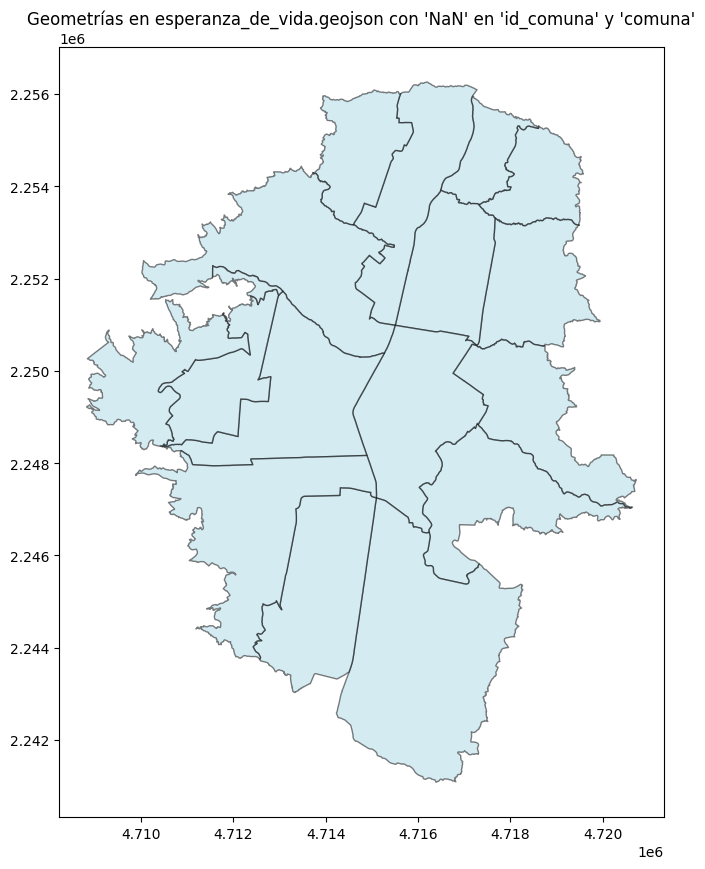



#######################################################################3

¡Este DataFrame tiene todas las filas con 'NaN' en las columnas 'id_comuna' y 'comuna'!
DataFrame: cuerpos_de_agua_de_refere.geojson
Index(['geometry', 'OBJECTID', 'nombre', 'fecha_adopcion',
       'fecha_actualizacion', 'Shape_Length', 'Shape_Area', 'comuna',
       'id_comuna', 'centroid'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   geometry             5 non-null      geometry
 1   OBJECTID             5 non-null      int64   
 2   nombre               5 non-null      object  
 3   fecha_adopcion       5 non-null      int64   
 4   fecha_actualizacion  5 non-null      int64   
 5   Shape_Length         5 non-null      float64 
 6   Shape_Area           5 non-null      float64 
 7   comuna               0 non-null   

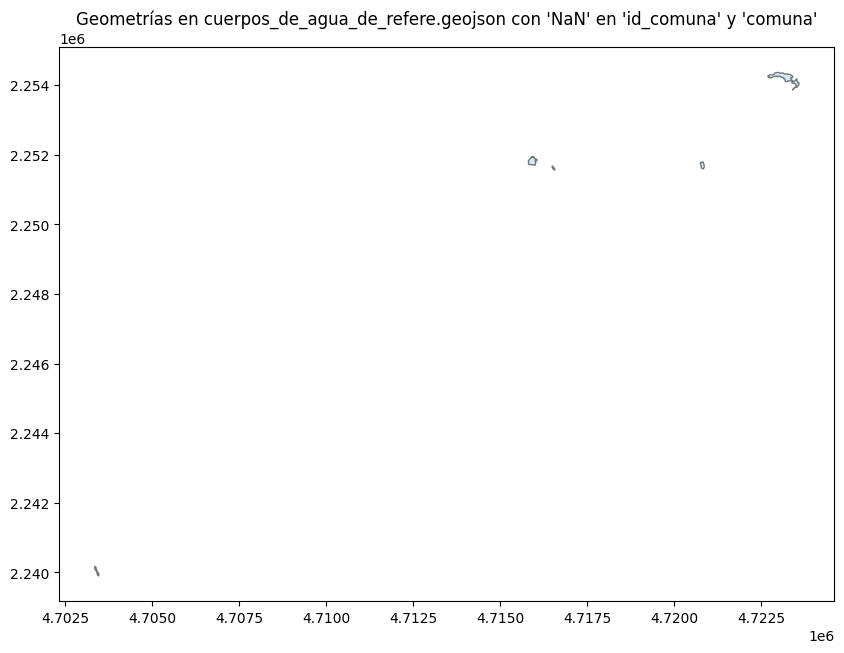



#######################################################################3

¡Este DataFrame tiene todas las filas con 'NaN' en las columnas 'id_comuna' y 'comuna'!
DataFrame: pot48_2014_red_hidrica_.geojson
Index(['geometry', 'OBJECTID', 'jerarquia', 'nombre', 'Shape_Length', 'comuna',
       'id_comuna', 'centroid'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      817 non-null    geometry
 1   OBJECTID      817 non-null    int64   
 2   jerarquia     817 non-null    object  
 3   nombre        816 non-null    object  
 4   Shape_Length  817 non-null    float64 
 5   comuna        0 non-null      object  
 6   id_comuna     0 non-null      object  
 7   centroid      0 non-null      object  
dtypes: float64(1), geometry(1), int64(1), object(5)
memory usage: 51.2+ KB
None
                         

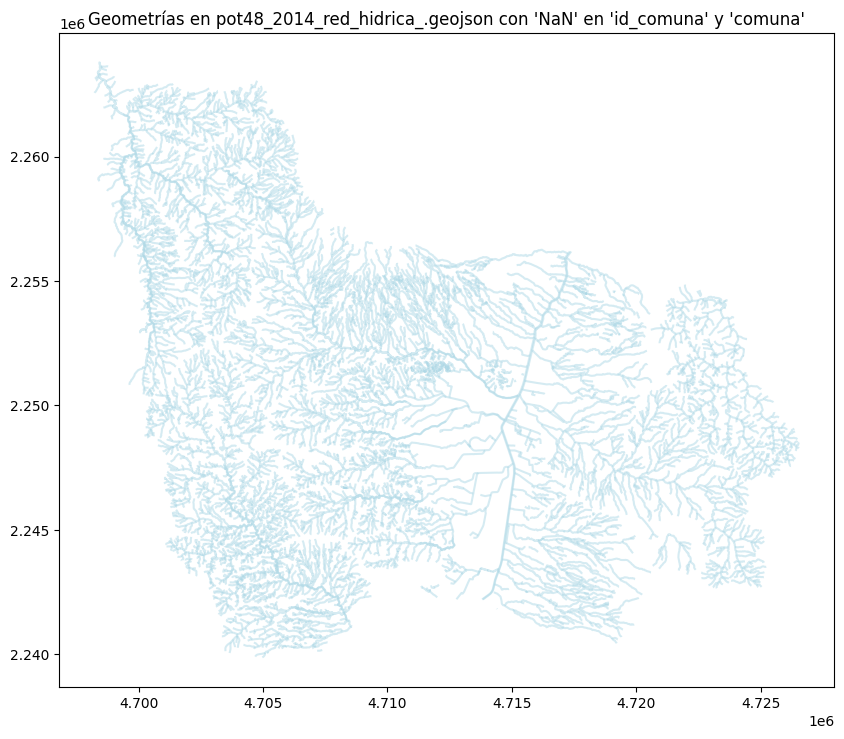



#######################################################################3

¡Este DataFrame tiene todas las filas con 'NaN' en las columnas 'id_comuna' y 'comuna'!
DataFrame: pot48_2014_plantas_de_pot.geojson
Index(['geometry', 'OBJECTID', 'localizacion', 'administrador', 'elemento',
       'fecha_adopcion', 'fecha_actualizacion', 'comuna', 'id_comuna'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   geometry             29 non-null     geometry
 1   OBJECTID             29 non-null     int64   
 2   localizacion         29 non-null     object  
 3   administrador        29 non-null     object  
 4   elemento             29 non-null     object  
 5   fecha_adopcion       29 non-null     int64   
 6   fecha_actualizacion  29 non-null     int64   
 7   comuna               0 non-null      object  
 

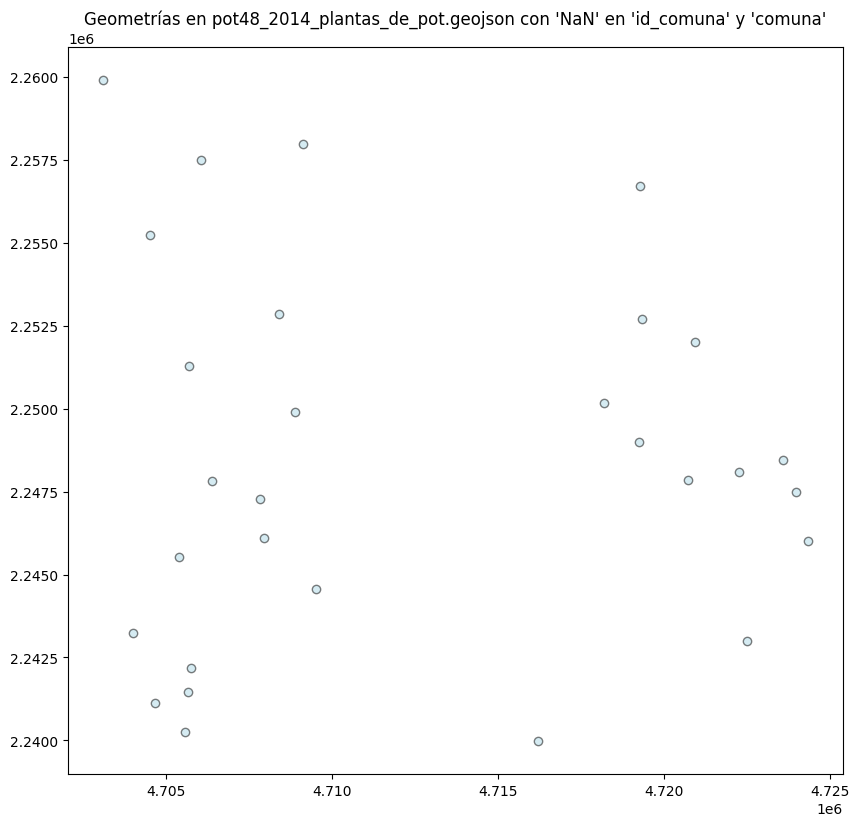



#######################################################################3

¡Este DataFrame tiene todas las filas con 'NaN' en las columnas 'id_comuna' y 'comuna'!
DataFrame: producto_interno_bruto.geojson
Index(['geometry', 'OBJECTID', 'codigo', 'nombre', 'i_2014', 'i_2015',
       'i_2016', 'i_2017', 'i_2018', 'i_2019', 'i_2020', 'i_2021', 'i_2022',
       'i_2023', 'Shape_Length', 'Shape_Area', 'comuna', 'id_comuna',
       'centroid'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      1 non-null      geometry
 1   OBJECTID      1 non-null      int64   
 2   codigo        0 non-null      object  
 3   nombre        1 non-null      object  
 4   i_2014        1 non-null      int64   
 5   i_2015        1 non-null      int64   
 6   i_2016        1 non-null      int64   
 7   i_2017        1 non-null

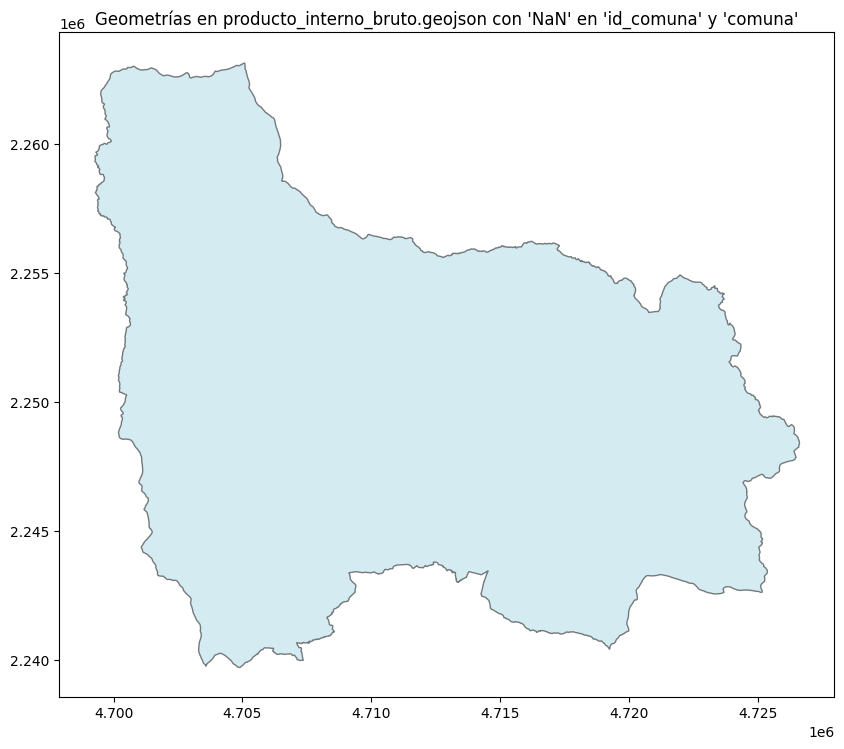



#######################################################################3

¡Este DataFrame tiene todas las filas con 'NaN' en las columnas 'id_comuna' y 'comuna'!
DataFrame: indice_desarrollo_humano.geojson
Index(['geometry', 'OBJECTID', 'codigo', 'nombre', 'i_2014', 'i_2015',
       'i_2016', 'i_2017', 'i_2018', 'i_2019', 'i_2020', 'i_2021', 'i_2022',
       'i_2023', 'Shape_Length', 'Shape_Area', 'comuna', 'id_comuna',
       'centroid'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      21 non-null     geometry
 1   OBJECTID      21 non-null     int64   
 2   codigo        21 non-null     object  
 3   nombre        21 non-null     object  
 4   i_2014        21 non-null     float64 
 5   i_2015        21 non-null     float64 
 6   i_2016        21 non-null     float64 
 7   i_2017        21 non

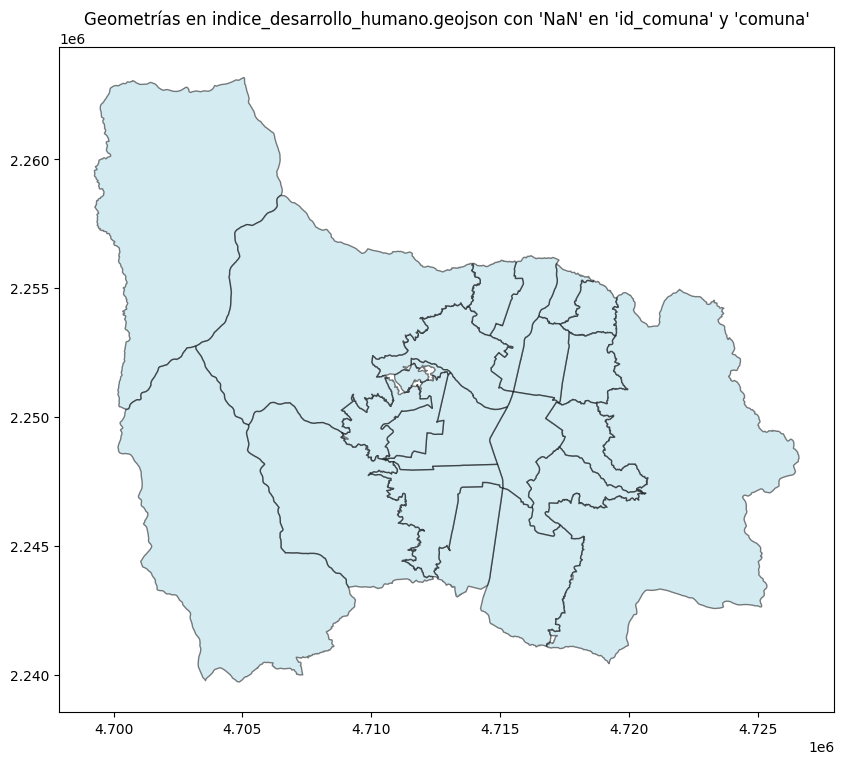



#######################################################################3

¡Este DataFrame tiene todas las filas con 'NaN' en las columnas 'id_comuna' y 'comuna'!
DataFrame: inseguridad_alimentaria.geojson
Index(['geometry', 'OBJECTID', 'codigo', 'nombre', 'total_2014', 'total_2015',
       'total_2016', 'total_2017', 'total_2018', 'total_2019', 'total_2020',
       'total_2021', 'total_2022', 'total_2023', 'leve_2014', 'leve_2015',
       'leve_2016', 'leve_2017', 'leve_2018', 'leve_2019', 'leve_2020',
       'leve_2021', 'leve_2022', 'leve_2023', 'moderada_2014', 'moderada_2015',
       'moderada_2016', 'moderada_2017', 'moderada_2018', 'moderada_2019',
       'moderada_2020', 'moderada_2021', 'moderada_2022', 'moderada_2023',
       'severa_2014', 'severa_2015', 'severa_2016', 'severa_2017',
       'severa_2018', 'severa_2019', 'severa_2020', 'severa_2021',
       'severa_2022', 'severa_2023', 'Shape_Length', 'Shape_Area', 'comuna',
       'id_comuna', 'centroid'],
      dtype='obj

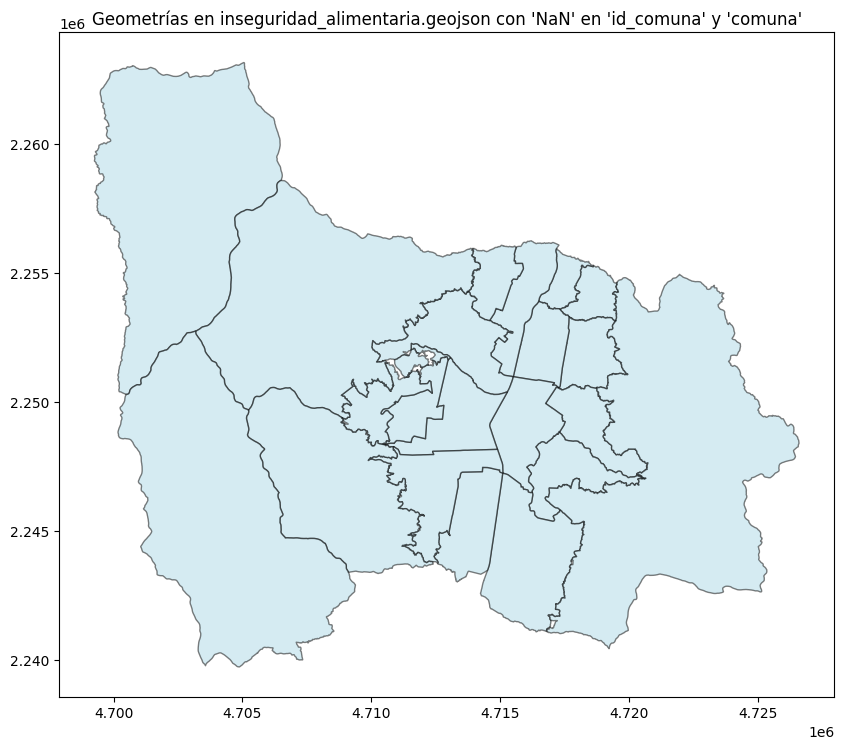



#######################################################################3

¡Este DataFrame tiene todas las filas con 'NaN' en las columnas 'id_comuna' y 'comuna'!
DataFrame: tasa_de_desempleo.geojson
Index(['geometry', 'OBJECTID', 'codigo', 'nombre', 'i_2014', 'i_2015',
       'i_2016', 'i_2017', 'i_2018', 'i_2019', 'i_2020', 'i_2021', 'i_2022',
       'i_2023', 'Shape_Length', 'Shape_Area', 'comuna', 'id_comuna',
       'centroid'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      21 non-null     geometry
 1   OBJECTID      21 non-null     int64   
 2   codigo        21 non-null     object  
 3   nombre        21 non-null     object  
 4   i_2014        16 non-null     float64 
 5   i_2015        16 non-null     float64 
 6   i_2016        16 non-null     float64 
 7   i_2017        16 non-null  

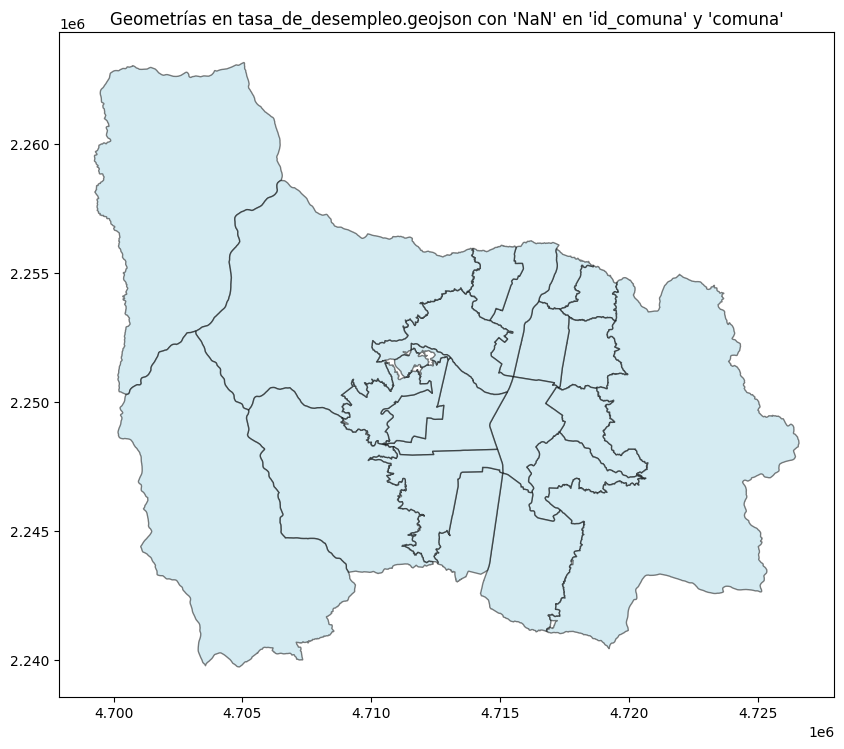



#######################################################################3

¡Este DataFrame tiene todas las filas con 'NaN' en las columnas 'id_comuna' y 'comuna'!
DataFrame: ecoparques.geojson
Index(['geometry', 'OBJECTID', 'nombre', 'quebrada_asociada', 'dominio',
       'funcion', 'categoria', 'subcategoria', 'jerarquia', 'orden',
       'direccion_referencia', 'cbml', 'id_zona', 'accion', 'Shape_Length',
       'Shape_Area', 'comuna', 'id_comuna', 'centroid'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   geometry              81 non-null     geometry
 1   OBJECTID              81 non-null     int64   
 2   nombre                81 non-null     object  
 3   quebrada_asociada     81 non-null     object  
 4   dominio               81 non-null     object  
 5   funcion               81 non-

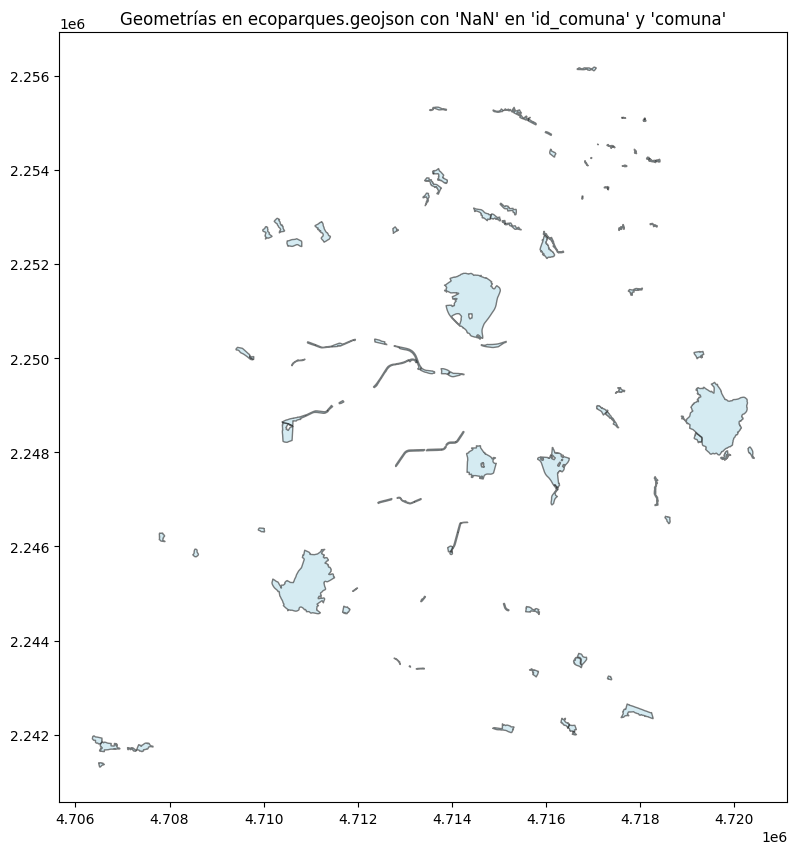



#######################################################################3


In [252]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


def investigar_geometrias(dict_actualizado):
    """
    Investiga y plotea las geometrías de los DataFrames que tienen todas sus filas con valores nulos en
    las columnas 'id_comuna' o 'comuna'.

    :param dict_actualizado: Diccionario con los DataFrames.
    :return: Diccionario con los DataFrames investigados.
    """
    # Crear un diccionario para almacenar los DataFrames que necesitan revisión
    investigar = {}

    for df_name, df in dict_actualizado.items():

        # Verificar si las columnas 'id_comuna' y 'comuna' están completamente vacías (todos los valores son NaN)
        if df['id_comuna'].isna().all() and df['comuna'].isna().all():
            investigar[df_name] = df  # Agregar al diccionario para revisión

            # Mostrar un mensaje indicando que se encontraron problemas en este DataFrame
            print(f"\n¡Este DataFrame tiene todas las filas con 'NaN' en las columnas 'id_comuna' y 'comuna'!")
            print(f"DataFrame: {df_name}")
            print(df.columns)
            print(df.info())
            print(df.head())

            # Plotear geometrías
            fig, ax = plt.subplots(1, 1, figsize=(10, 10))
            df.plot(ax=ax, edgecolor="black", color="lightblue", alpha=0.5)
            plt.title(f"Geometrías en {df_name} con 'NaN' en 'id_comuna' y 'comuna'")
            plt.show()
            print("\n")
            print("#######################################################################3")
    return investigar




dataframes_a_investigar=investigar_geometrias(dict_actualizado)


In [253]:
for df_name, df in dataframes_a_investigar.items():
  print(f"El df {df_name}: ",df.columns)
  #print(f"El df {df_name}: ",df.geometry.head())


El df esperanza_de_vida.geojson:  Index(['geometry', 'OBJECTID', 'codigo', 'nombre', 'total_2018', 'total_2019',
       'total_2020', 'total_2021', 'total_2022', 'total_2023', 'hombres_2018',
       'hombres_2019', 'hombres_2020', 'hombres_2021', 'hombres_2022',
       'hombres_2023', 'mujeres_2018', 'mujeres_2019', 'mujeres_2020',
       'mujeres_2021', 'mujeres_2022', 'mujeres_2023', 'Shape_Length',
       'Shape_Area', 'comuna', 'id_comuna', 'centroid'],
      dtype='object')
El df cuerpos_de_agua_de_refere.geojson:  Index(['geometry', 'OBJECTID', 'nombre', 'fecha_adopcion',
       'fecha_actualizacion', 'Shape_Length', 'Shape_Area', 'comuna',
       'id_comuna', 'centroid'],
      dtype='object')
El df pot48_2014_red_hidrica_.geojson:  Index(['geometry', 'OBJECTID', 'jerarquia', 'nombre', 'Shape_Length', 'comuna',
       'id_comuna', 'centroid'],
      dtype='object')
El df pot48_2014_plantas_de_pot.geojson:  Index(['geometry', 'OBJECTID', 'localizacion', 'administrador', 'elemento

In [254]:
gdf_comunas2=gdf_comunas.copy()

In [255]:
pip install unidecode


In [256]:
from unidecode import unidecode

#hacemos unidecode
gdf_comunas2['NOMBRE'] = gdf_comunas2['NOMBRE'].apply(lambda x: unidecode(x).lower())
dataframes_a_investigar["indice_desarrollo_humano.geojson"]['nombre']=dataframes_a_investigar["indice_desarrollo_humano.geojson"]['nombre'].apply(lambda x: unidecode(x).lower())

print(gdf_comunas2['NOMBRE'])
print(dataframes_a_investigar["indice_desarrollo_humano.geojson"]['nombre'].unique())

0                                        popular
1                                     santa cruz
2                                       manrique
3                                       aranjuez
4                                       castilla
5                                doce de octubre
6                                        robledo
7                                  villa hermosa
8                                   buenos aires
9                                  la candelaria
10                              laureles estadio
11                                    la america
12                                    san javier
13                                    el poblado
14                                         belen
15    corregimiento de san sebastian de palmitas
16                corregimiento de san cristobal
17                    corregimiento de altavista
18                  corregimiento de santa elena
19                                   sin nombre1
20         corregimi

In [257]:
gdf_comunas2['geometry_actualizada'] = gdf_comunas2['geometry']

for idx_comunas, row_comunas in gdf_comunas2.iterrows():
    nombre_comuna = row_comunas['NOMBRE']

    for idx_investigar, row_investigar in dataframes_a_investigar["indice_desarrollo_humano.geojson"].iterrows():
        nombre_investigar = row_investigar['nombre']

        if (nombre_comuna in nombre_investigar) or (nombre_investigar in nombre_comuna):
            # Actualizar la geometría si hay coincidencia
            gdf_comunas2.at[idx_comunas, 'geometry_actualizada'] = row_investigar['geometry']
            break

gdf_comunas2['geometry'] = gdf_comunas2['geometry_actualizada']

gdf_comunas2 = gdf_comunas2.drop(columns=['geometry_actualizada'])

print(gdf_comunas2['geometry'])

0     POLYGON ((4718193.0724 2255308.0136, 4718182.7...
1     POLYGON ((4717199.3644 2255945.395, 4717195.76...
2     POLYGON ((4718792.5832 2253310.702, 4718790.16...
3     POLYGON ((4716607.2973 2253867.4491, 4716607.1...
4     POLYGON ((4716246.1872 2256230.621, 4716238.19...
5     POLYGON ((4715116.5841 2256050.1927, 4715114.6...
6     POLYGON ((4713487.9339 2254398.6194, 4713487.7...
7     POLYGON ((4717867.1318 2250665.3081, 4717865.1...
8     POLYGON ((4717386.8305 2248752.2672, 4717385.6...
9     POLYGON ((4716374.4743 2250846.7879, 4716331.1...
10    POLYGON ((4713365.7616 2251348.9456, 4713364.9...
11    POLYGON ((4712943.4423 2251744.1314, 4712939.4...
12    MULTIPOLYGON (((4710686.6561 2251536.4543, 471...
13    POLYGON ((4715808.6164 2246717.3053, 4715808.4...
14    POLYGON ((4711053.4411 2248131.8017, 4711049.4...
15    POLYGON ((4705075.4885 2263067.287, 4705079.46...
16    MULTIPOLYGON (((4706980.6799 2258316.6202, 470...
17    POLYGON ((4706384.83 2250508.4381, 4706349

In [258]:
# gdf_comunas2
dataframes_a_investigar["indice_desarrollo_humano.geojson"]

,geometry,OBJECTID,codigo,nombre,i_2014,i_2015,i_2016,i_2017,i_2018,i_2019,i_2020,i_2021,i_2022,i_2023,Shape_Length,Shape_Area,comuna,id_comuna,centroid
0,"POLYGON ((4718193.072 2255308.014, 4718182.769...",1,01,popular,0.57,0.64,0.58,0.58,0.58,0.57,0.56,0.61,None,None,9604.448562,3.097941e+06,None,None,POINT (4718611.922461627 2254112.982707414)
1,"POLYGON ((4717199.364 2255945.395, 4717195.762...",2,02,santa cruz,0.58,0.65,0.60,0.60,0.60,0.62,0.57,0.64,None,None,8597.294374,2.195663e+06,None,None,POINT (4717471.901360852 2254648.311125567)
2,"POLYGON ((4718792.583 2253310.702, 4718790.16 ...",3,03,manrique,0.61,0.68,0.61,0.62,0.62,0.62,0.57,0.64,None,None,12077.559132,5.096182e+06,None,None,POINT (4718479.607630702 2251852.493705314)
3,"POLYGON ((4716607.297 2253867.449, 4716607.168...",4,04,aranjuez,0.65,0.70,0.64,0.66,0.68,0.70,0.67,0.68,None,None,9642.676543,4.883314e+06,None,None,POINT (4716680.2916272 2252195.0294205993)
4,"POLYGON ((4716246.187 2256230.621, 4716238.195...",5,05,castilla,0.67,0.72,0.69,0.66,0.73,0.75,0.61,0.70,None,None,16098.032108,6.063916e+06,None,None,POINT (4715903.412076722 2253981.9996353053)
5,"POLYGON ((4715116.584 2256050.193, 4715114.635...",6,06,doce de octubre,0.62,0.70,0.63,0.64,0.67,0.68,0.60,0.67,None,None,10709.846407,3.849812e+06,None,None,POINT (4714743.451115297 2254761.3938639564)
6,"POLYGON ((4713487.934 2254398.619, 4713487.771...",7,07,robledo,0.66,0.70,0.67,0.67,0.68,0.68,0.61,0.70,None,None,23265.233431,9.462008e+06,None,None,POINT (4713275.711340136 2252410.442097505)
7,"POLYGON ((4717867.132 2250665.308, 4717865.134...",8,08,villa hermosa,0.63,0.69,0.62,0.64,0.62,0.62,0.59,0.65,None,None,16392.858845,5.716968e+06,None,None,POINT (4718584.283001073 2249006.5964515163)
8,"POLYGON ((4717386.83 2248752.267, 4717385.652 ...",9,09,buenos aires,0.68,0.74,0.69,0.68,0.68,0.67,0.60,0.70,None,None,18364.902995,6.052668e+06,None,None,POINT (4717615.286807095 2247244.748245374)
9,"POLYGON ((4716374.474 2250846.788, 4716331.146...",10,10,la candelaria,0.75,0.76,0.74,0.73,0.76,0.78,0.63,0.73,None,None,13632.701395,7.360811e+06,None,None,POINT (4715944.532195215 2249048.124315349)


In [259]:
dict_inv = asignar_comuna_a_points(dataframes_a_investigar, gdf_comunas2)

In [260]:
for df_name, df in dict_inv.items():
    print(f"DataFrame: {df_name}")
    print(df.info())
    print("\n")

DataFrame: esperanza_de_vida.geojson
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      16 non-null     geometry
 1   OBJECTID      16 non-null     int64   
 2   codigo        16 non-null     object  
 3   nombre        16 non-null     object  
 4   total_2018    16 non-null     float64 
 5   total_2019    16 non-null     float64 
 6   total_2020    16 non-null     float64 
 7   total_2021    16 non-null     float64 
 8   total_2022    16 non-null     float64 
 9   total_2023    16 non-null     float64 
 10  hombres_2018  16 non-null     float64 
 11  hombres_2019  16 non-null     float64 
 12  hombres_2020  16 non-null     float64 
 13  hombres_2021  16 non-null     float64 
 14  hombres_2022  16 non-null     float64 
 15  hombres_2023  16 non-null     float64 
 16  mujeres_2018  16 non-null     float64 
 17  mujeres_201

#Limpieza (ETL)

In [261]:

for df_name, df in dataframes_a_investigar.items():
    print(f"DataFrame: {df_name}")
    if "nombre" in df.columns:
      print(df.nombre.unique())

DataFrame: esperanza_de_vida.geojson
['Popular' 'Santa Cruz' 'Manrique' 'Aranjuez' 'Castilla' 'Doce de Octubre'
 'Robledo' 'Villa Hermosa' 'Buenos Aires' 'La Candelaria'
 'Laureles Estadio' 'La América' 'San Javier' 'El Poblado' 'Guayabal'
 'Belén']
DataFrame: cuerpos_de_agua_de_refere.geojson
['Lago del Parque Norte' 'Lago del Jardín Botánico' 'Humedal Romeral'
 'Laguna de Guarne' 'Embalse de Piedras Blancas']
DataFrame: pot48_2014_red_hidrica_.geojson
['Q. Robledales 1' 'Q. Robledales' 'Caño Palenque' 'Caño N'
 'Caño La Carmelita' 'Q. Tierra Grata 1' 'Q. La Lejía' 'Q. El  Hato 2'
 'Q. Blanquizala' 'Q. La Honda  2' 'Q. La Bolsa 2' 'Q. Tiburcio 2'
 'Aguas  Negras' 'Q. La Campiña' 'Caño Las Paulinas' 'Q. Santa Ana 1'
 'Q. Travesias' 'Q. La Cumbre 2' 'Q. Las Palacios' 'Q. Granizal 1'
 'Q. La Cican' 'Q. Tierra Grata' 'Q. Granizal 2' 'Q. Casa Bella'
 'Q. La China o la Sucia' 'Caño Bocatoma' 'Q. La Sapera'
 'Caño Torres de Olaya' 'Q. La  Astillera' 'Q. La Roma' 'Q. El  Rodal'
 'Caño Primave

In [262]:
def limpiar_comuna_id(diccionario):
    for key, df in diccionario.items():
        diccionario[key] = df[(df['id_comuna'].notna()) & (df['id_comuna'] != 0)]
    return diccionario

limpiar_comuna_id(dict_actualizado)


{'esperanza_de_vida.geojson':                                              geometry  OBJECTID codigo  \
 0   POLYGON ((4718193.072 2255308.014, 4718182.769...         1     01   
 1   POLYGON ((4717199.364 2255945.395, 4717195.762...         2     02   
 2   POLYGON ((4718792.583 2253310.702, 4718790.16 ...         3     03   
 3   POLYGON ((4716607.297 2253867.449, 4716607.168...         4     04   
 4   POLYGON ((4716246.187 2256230.621, 4716238.195...         5     05   
 5   POLYGON ((4715116.584 2256050.193, 4715114.635...         6     06   
 6   POLYGON ((4713487.934 2254398.619, 4713487.771...         7     07   
 7   POLYGON ((4717867.132 2250665.308, 4717865.134...         8     08   
 8   POLYGON ((4717386.83 2248752.267, 4717385.652 ...         9     09   
 9   POLYGON ((4716374.474 2250846.788, 4716331.146...        10     10   
 10  POLYGON ((4713365.762 2251348.946, 4713364.975...        11     11   
 11  POLYGON ((4712943.442 2251744.131, 4712939.495...        12     12

In [263]:

for key in list(dict_actualizado.keys()):  # Usamos list() para evitar cambiar el tamaño del diccionario mientras iteramos
    if key in dataframes_a_investigar:
        del dict_actualizado[key]

In [264]:
for df_name, df in dict_actualizado.items():

    print(f"DataFrame: {df_name}")


DataFrame: centros_comerciales
DataFrame: universidades.geojson
DataFrame: restaurantes_and_cafes.geojson
DataFrame: drogueria.geojson
DataFrame: medellin_apartamentos_venta.geojson
DataFrame: medellin_casas_venta.geojson
DataFrame: poverty_index.geojson
DataFrame: hoteles_2.geojson
DataFrame: atractivos_turisticos.geojson
DataFrame: fuentes_semilleras.geojson
DataFrame: tiendas.geojson


In [265]:
for df_name in dict_actualizado.keys():
  print(df_name)

centros_comerciales
universidades.geojson
restaurantes_and_cafes.geojson
drogueria.geojson
medellin_apartamentos_venta.geojson
medellin_casas_venta.geojson
poverty_index.geojson
hoteles_2.geojson
atractivos_turisticos.geojson
fuentes_semilleras.geojson
tiendas.geojson


# A descargar

In [266]:
!ls /content/drive/MyDrive/Medellin/archivos/pa_brincar/

atractivos_turisticos.geojson  indice_desarrollo_humano.geojson     tasa_de_desempleo.geojson
centros_comerciales	       medellin_apartamentos_venta.geojson  tiendas.geojson
drogueria.geojson	       medellin_casas_venta.geojson	    universidades.geojson
fuentes_semilleras.geojson     poverty_index.geojson
hoteles_2.geojson	       restaurantes_and_cafes.geojson


In [267]:
dict_actualizado.keys()

dict_keys(['centros_comerciales', 'universidades.geojson', 'restaurantes_and_cafes.geojson', 'drogueria.geojson', 'medellin_apartamentos_venta.geojson', 'medellin_casas_venta.geojson', 'poverty_index.geojson', 'hoteles_2.geojson', 'atractivos_turisticos.geojson', 'fuentes_semilleras.geojson', 'tiendas.geojson'])

In [268]:
dict_actualizado["medellin_apartamentos_venta.geojson"]

,_id,pagina,ubicacion,ubicacion_asociada,codigo_fr,image,direccion,latitud,longitud,inmobiliaria,...,precio,parqueaderos,administracion,piso_n,pisos_interiores,acepta_permuta,remodelado,geometry,comuna,id_comuna
52,{'$oid': '67229803681d5fb27ded4b4b'},finca_raiz,"El Poblado, Medellín, Antioquia","El Poblado, Vía Las Palmas, Asomadera no.2",191421953,https://cdn2.infocasas.com.uy/repo/img/66ec24d...,CARRERA 32 16- 285,6.218228,-75.562286,BEMSA,...,1410000000,2,"867,000.00",None,None,NaN,NaN,POINT (-75.5622855 6.2182279),Buenos Aires,09
53,{'$oid': '67229803681d5fb27ded4b4c'},finca_raiz,"San Lucas, Medellín, Antioquia","San Lucas, Transversal Superior, Los naranjos",191422599,https://cdn2.infocasas.com.uy/repo/img/66ec280...,CARRERA 25 12S- 330,6.197444,-75.55719,BEMSA,...,{'$numberLong': '3300000000'},3,"1,870,000.00",None,None,NaN,NaN,POINT (-75.5571896 6.1974442),El Poblado,14
54,{'$oid': '67229803681d5fb27ded4b4d'},finca_raiz,"El Poblado, Medellín, Antioquia","El tesoro, El Poblado",191422900,https://cdn2.infocasas.com.uy/repo/img/66ec298...,CARRERA 27 7B- 180,6.206693,-75.556968,BEMSA,...,1650000000,2,"920,000.00",None,None,NaN,NaN,POINT (-75.5569677 6.2066932),El Poblado,14
59,{'$oid': '67229836681d5fb27ded4b52'},finca_raiz,"San german, Medellín, Antioquia",San german,191604995,https://cdn2.infocasas.com.uy/repo/img/67198af...,tierra firma san german,6.271741,-75.590235,PISO ALTO INMOBILIARIA,...,395000000,1,"237,000.00",18,18,NaN,NaN,POINT (-75.5902353 6.271741),Robledo,07
60,{'$oid': '67229836681d5fb27ded4b53'},finca_raiz,"Los colores, Medellín, Antioquia","Laureles, Urbanizacion estadio plaza, San german",11108450,https://cdn2.infocasas.com.uy/repo/img/6706c2c...,Carrera 76 # 53 - 215,6.26511,-75.588762,CITY RAIZ,...,374000000,None,"253,100.00",3,3,NaN,NaN,POINT (-75.588761822163 6.265110067807),Laureles Estadio,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,{'$oid': '67229c19681d5fb27ded4bf6'},finca_raiz,"El tesoro, Medellín, Antioquia","Transversal Inferior, El tesoro, El Poblado",191485191,https://cdn2.infocasas.com.uy/repo/img/6719b61...,KR 27 # 7B - 185,6.206485,-75.558214,Engel & Volkers,...,1100000000,2,"758,000.00",10,10,NaN,NaN,POINT (-75.558214140723 6.2064851160538),El Poblado,14
224,{'$oid': '67229c19681d5fb27ded4bf7'},finca_raiz,"Calasanz, Medellín, Antioquia",Calasanz,191561164,https://cdn2.infocasas.com.uy/repo/img/6709a5e...,"Medellín, Altos de Calasanz",6.260916,-75.598985,YESSICA ANDREA GIRALDO RUA,...,440000000,1,"387,900.00",18,18,NaN,NaN,POINT (-75.5989846 6.2609158),La América,12
225,{'$oid': '67229c19681d5fb27ded4bf8'},finca_raiz,"Medellín, Antioquia","Alejandria, El Poblado, Los Balsos",191466954,https://cdn2.infocasas.com.uy/repo/img/66f44d4...,-,6.196292,-75.569682,Yaencontre,...,1420000000,2,"1,119,000.00",1,1,NaN,NaN,POINT (-75.569682266287 6.196291954966),El Poblado,14
226,{'$oid': '67229c23681d5fb27ded4bf9'},finca_raiz,"San german, Medellín, Antioquia","Laureles, San german, Los colores",191523334,https://cdn2.infocasas.com.uy/repo/img/66ff018...,"Urbanización Cuarzo Tierra Firme, Carrera 77 #...",6.269655,-75.59166,YAMILE RODRIGUEZ JARAMILLO,...,462000000,1,"273,880.00",8,8,NaN,NaN,POINT (-75.5916597 6.2696551),Robledo,07


In [269]:
for df_name, df in dict_actualizado.items():
    print(f"DataFrame: {df_name}")
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
    gdf.to_file(f"/content/drive/MyDrive/Medellin/archivos/pa_brincar/{df_name}", driver="GeoJSON")

DataFrame: centros_comerciales
DataFrame: universidades.geojson
DataFrame: restaurantes_and_cafes.geojson
DataFrame: drogueria.geojson
DataFrame: medellin_apartamentos_venta.geojson


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not 

DataFrame: medellin_casas_venta.geojson
DataFrame: poverty_index.geojson


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


DataFrame: hoteles_2.geojson
DataFrame: atractivos_turisticos.geojson
DataFrame: fuentes_semilleras.geojson


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


DataFrame: tiendas.geojson


/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [270]:
gdf_comunas2=gdf_comunas.copy()


def actualizar_geometria(gdf_comunas2, df):
    # Normalizar los nombres en ambos DataFrames (sin acentos y en minúsculas)
    gdf_comunas2['NOMBRE'] = gdf_comunas2['NOMBRE'].apply(lambda x: unidecode(x).lower())
    df['nombre'] = df['nombre'].apply(lambda x: unidecode(x).lower())

    # Crear una columna de geometría actualizada
    df['geometry_actualizada'] = df['geometry']

    # Iterar sobre las comunas y las filas del df para encontrar coincidencias
    for idx_comunas, row_comunas in gdf_comunas2.iterrows():
        nombre_comuna = row_comunas['NOMBRE']

        for idx_investigar, row_investigar in df.iterrows():
            nombre_investigar = row_investigar['nombre']

            # Si hay una coincidencia de nombre, actualizar la geometría
            if nombre_comuna in nombre_investigar or nombre_investigar in nombre_comuna:
                # Actualizar la geometría en la fila correspondiente de df
                df.at[idx_investigar, 'geometry_actualizada'] = row_comunas['geometry']
                break  # Salir del bucle una vez que se haya encontrado la coincidencia

    # Actualizar la columna geometry en df y eliminar la columna temporal geometry_actualizada
    df['geometry'] = df['geometry_actualizada']
    df = df.drop(columns=['geometry_actualizada'])

    return df

l = ["tasa_de_desempleo.geojson", "indice_desarrollo_humano.geojson"]


for df_name, df in dict_inv.items():
    if df_name in l:
      df_actualizado = actualizar_geometria(gdf_comunas2, df)  # Actualizar geometría
      df = df_actualizado.drop(columns=['centroid'])
      df_actualizado["centroid"] = df_actualizado.geometry.centroid
      print(df_actualizado.head())
      gdf = gpd.GeoDataFrame(df, geometry='geometry')

      gdf.to_file(f"/content/drive/MyDrive/Medellin/archivos/pa_brincar/{df_name}", driver="GeoJSON")



                                            geometry  OBJECTID codigo  \
0  POLYGON ((-75.54803 6.30436, -75.54812 6.30435...         1     01   
1  POLYGON ((-75.55703 6.31007, -75.55707 6.31011...         2     02   
2  POLYGON ((-75.54252 6.28632, -75.54254 6.28633...         3     03   
3  POLYGON ((-75.56229 6.29126, -75.56229 6.29126...         4     04   
4  POLYGON ((-75.56566 6.31261, -75.56573 6.31263...         5     05   

       nombre  i_2014  i_2015  i_2016  i_2017  i_2018  i_2019  i_2020  i_2021  \
0     popular    0.57    0.64    0.58    0.58    0.58    0.57    0.56    0.61   
1  santa cruz    0.58    0.65    0.60    0.60    0.60    0.62    0.57    0.64   
2    manrique    0.61    0.68    0.61    0.62    0.62    0.62    0.57    0.64   
3    aranjuez    0.65    0.70    0.64    0.66    0.68    0.70    0.67    0.68   
4    castilla    0.67    0.72    0.69    0.66    0.73    0.75    0.61    0.70   

  i_2022 i_2023  Shape_Length    Shape_Area      comuna id_comuna  \
0   N

/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


                                            geometry  OBJECTID codigo  \
0  POLYGON ((-75.54803 6.30436, -75.54812 6.30435...         1     01   
1  POLYGON ((-75.55703 6.31007, -75.55707 6.31011...         2     02   
2  POLYGON ((-75.54252 6.28632, -75.54254 6.28633...         3     03   
3  POLYGON ((-75.56229 6.29126, -75.56229 6.29126...         4     04   
4  POLYGON ((-75.56566 6.31261, -75.56573 6.31263...         5     05   

       nombre  i_2014  i_2015  i_2016  i_2017  i_2018  i_2019  i_2020  i_2021  \
0     popular   11.48   10.68   14.18   14.91   13.60   17.90   22.94   20.59   
1  santa cruz   11.19   10.99   11.26   11.16   13.11   12.54   21.89   19.63   
2    manrique   10.97   12.63   10.92   11.98   13.84   13.16   26.92   20.94   
3    aranjuez    9.54    9.45    9.22   11.03   12.67   13.46   19.27   18.30   
4    castilla    7.70    9.70    8.20    8.90   11.63   10.75   18.09   17.60   

   i_2022 i_2023  Shape_Length    Shape_Area      comuna id_comuna  \
0   

/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [271]:
dict_inv["tasa_de_desempleo.geojson"].to_file(f"/content/drive/MyDrive/Medellin/archivos/pa_brincar/tasa_desempleo.geojson", driver="GeoJSON")
dict_inv["indice_desarrollo_humano.geojson"] .to_file(f"/content/drive/MyDrive/Medellin/archivos/pa_brincar/indice_desarrollo.geojson", driver="GeoJSON")

ValueError: GeoDataFrame contains multiple geometry columns but GeoDataFrame.to_file supports only a single geometry column. Use a GeoDataFrame.to_parquet or GeoDataFrame.to_feather, drop additional geometry columns or convert them to a supported format like a well-known text (WKT) using `GeoSeries.to_wkt()`.

#Indicadores

In [272]:
pip install ahpy

In [273]:
def normalizar_1a5(df, columna):
    """
    Esta función normaliza los valores de una columna de un DataFrame
    en el rango de 1 a 5.

    :param df: DataFrame que contiene la columna a normalizar.
    :param columna: Nombre de la columna que se va a normalizar.

    :return: DataFrame con la columna normalizada.
    """
    # Normalización de la columna al rango 1-5
    df[columna + '_normalizada'] = ((df[columna] - df[columna].min()) / (df[columna].max() - df[columna].min())) * (5 - 1) + 1

    return df

In [274]:
# Función para calcular la distancia media y contar puntos dentro de una comuna
def calcular_indicadores(gdf_comuna, gdf_puntos, columna_distancia, columna_cantidad):
    distancias_medias = []
    cantidades = []

    for _, comuna in gdf_comuna.iterrows():
        # Calcular la distancia a cada punto (hotel o atractivo turístico) desde el centroide de la comuna
        centroide = comuna['centroid']
        distancias = gdf_puntos.geometry.distance(centroide)

        # Filtrar puntos que están dentro de la comuna
        puntos_en_comuna = gdf_puntos[gdf_puntos.within(comuna.geometry)]

        # Calcular distancia media y cantidad
        distancia_media = distancias.mean() if not distancias.empty else 0
        cantidad = len(puntos_en_comuna)

        distancias_medias.append(distancia_media)
        cantidades.append(cantidad)

    # Agregar los resultados al DataFrame de la comuna
    gdf_comuna[columna_distancia] = distancias_medias
    gdf_comuna[columna_cantidad] = cantidades


##INDICADOR_TURISTICO

In [275]:
# gdf_comunas
# dict_actualizado["atractivos_turisticos.geojson"]
# dict_actualizado["hoteles_2.geojson"]

In [276]:
dict_actualizado["atractivos_turisticos.geojson"].head()

,geometry,OBJECTID,imperdible,cod_comuna,cod,nombre_sitio,tipo_atractivo,orden_visualizacion,direccion,sitio_web,nombre_comuna,cod_barrio,barrio,x_origen_nacional,y_origen_nacional,latitud,longitud,comuna,id_comuna
0,POINT (-75.59167 6.22229),1,NO,15,AT001,Aeroparque Parque Juan Pablo II,Parque temático y recreativo,14,CR 70 No. 16 - 04,https://aeroparquejuanpablo.gov.co/,Guayabal,Inst_19,Parque Juan Pablo II,4.713318e+06,2.246255e+06,6.222290,-75.591675,Guayabal,15
1,POINT (-75.58948 6.21887),2,NO,15,AT002,Aeropuerto Enrique Olaya Herrera,Aeropuerto de pasajeros,37,CR 65 A No. 13 - 157,https://www.aeropuertomedellin.co/,Guayabal,Inst_19,Parque Juan Pablo II,4.713559e+06,2.245875e+06,6.218872,-75.589478,Guayabal,15
2,POINT (-75.56183 6.25952),3,NO,10,AT003,Barrio Prado,Sector urbano o rural de interés,0,CR 50 No. 62-99,,La Candelaria,1001,Prado,4.716641e+06,2.250356e+06,6.259521,-75.561829,La Candelaria,10
3,POINT (-75.5675 6.25012),4,NO,10,AT004,Basílica Menor Nuestra Señora de la Candelaria,Basílica,35,CR 49 a No. 50 - 85,https://arqmedellin.co/parroquias/nuestra-seno...,La Candelaria,1019,La Candelaria,4.716008e+06,2.249320e+06,6.250122,-75.567505,La Candelaria,10
4,POINT (-75.58832 6.25128),5,NO,11,AT005,Bulevar Libertadores de América,Sector urbano o rural de interés,2,CR 70 entre la CL 47D y circular 1A,,Laureles Estadio,1117,Florida Nueva,4.713705e+06,2.249459e+06,6.251282,-75.588318,Laureles Estadio,11


In [277]:
dict_actualizado["hoteles_2.geojson"].head()

,geometry,OBJECTID,Nombre,Tipo,Dirección,Ciudad,comuna,id_comuna
898,POINT (-75.5955 6.21734),2899,Amoblados Medellin,Hostel,"Carrera 72 9 1-99, Diego Echavarria, Belen, Me...",Medellín,Belén,16
899,POINT (-75.59562 6.21087),2900,Portal del Rodeo,Hotel,"La Mota, Belen, Medellín, Antioquia",Medellín,Belén,16
900,POINT (-75.5955 6.22107),2901,Unidad Residencial Portofino,Hostel,"Calle 14 72, Las Playas, Belen, Medellín, Anti...",Medellín,Belén,16
901,POINT (-75.597 6.2217),2902,El Oasis,Hotel,"Calle 14 75 1-99, Las Playas, Belen, Medellín,...",Medellín,Belén,16
902,POINT (-75.61009 6.2427),2903,Habitaestudios Tamaiti,Hotel,"Carrera 85C 34, Santa Teresita, La America, Me...",Medellín,La América,12


In [278]:
import geopandas as gpd
from shapely.geometry import Point

# Copiar el DataFrame gdf_comuna en indicador_turistico
indicador_turistico = gdf_comunas.copy()

# Asegurarse de que todos los DataFrames están en el mismo sistema de coordenadas
dict_actualizado["atractivos_turisticos.geojson"] = dict_actualizado["atractivos_turisticos.geojson"].set_crs(gdf_comunas.crs, allow_override=True)
dict_actualizado["hoteles_2.geojson"] = dict_actualizado["hoteles_2.geojson"].set_crs(gdf_comunas.crs, allow_override=True)

# Calcular el centroide de cada comuna
indicador_turistico['centroid'] = indicador_turistico.geometry.centroid




# Calcular indicadores para hoteles
calcular_indicadores(indicador_turistico, dict_actualizado["hoteles_2.geojson"], 'distancia_media_hoteles', 'cantidad_hoteles')

# Calcular indicadores para atractivos turísticos
calcular_indicadores(indicador_turistico, dict_actualizado["atractivos_turisticos.geojson"], 'distancia_media_atractivos', 'cantidad_atractivos')





<ipython-input-278-1f197f50ee12>:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  indicador_turistico['centroid'] = indicador_turistico.geometry.centroid
<ipython-input-274-589cf786a42c>:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distancias = gdf_puntos.geometry.distance(centroide)
<ipython-input-274-589cf786a42c>:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distancias = gdf_puntos.geometry.distance(centroide)
<ipython-input-274-589cf786a42c>:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()'

In [279]:
print(indicador_turistico.head())

                                            geometry  OBJECTID CODIGO  \
0  POLYGON ((-75.54803 6.30436, -75.54812 6.30435...       321     01   
1  POLYGON ((-75.55703 6.31007, -75.55707 6.31011...       322     02   
2  POLYGON ((-75.54252 6.28632, -75.54254 6.28633...       323     03   
3  POLYGON ((-75.56229 6.29126, -75.56229 6.29126...       324     04   
4  POLYGON ((-75.56566 6.31261, -75.56573 6.31263...       325     05   

       NOMBRE IDENTIFICACION LIMITEMUNICIPIOID  SUBTIPO_COMUNACORREGIMIENTO  \
0     Popular       Comuna 1               001                            1   
1  Santa Cruz       Comuna 2               001                            1   
2    Manrique       Comuna 3               001                            1   
3    Aranjuez       Comuna 4               001                            1   
4    Castilla       Comuna 5               001                            1   

  LINK_DOCUMENTO     SHAPEAREA      SHAPELEN                   centroid  \
0          

In [280]:
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador
scaler = MinMaxScaler()

# Normalizar las columnas de distancia y cantidad
indicador_turistico[['distancia_media_hoteles_norm', 'cantidad_hoteles_norm', 'distancia_media_atractivos_norm', 'cantidad_atractivos_norm']] = scaler.fit_transform(indicador_turistico[['distancia_media_hoteles', 'cantidad_hoteles', 'distancia_media_atractivos', 'cantidad_atractivos']])



In [281]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Seleccionar las columnas necesarias para PCA
X_hoteles = indicador_turistico[['distancia_media_hoteles_norm', 'cantidad_hoteles_norm','distancia_media_atractivos_norm', 'cantidad_atractivos_norm']]

# Aplicar PCA a los datos de hoteles
pca_hoteles = PCA(n_components=1)  # Usamos 1 componente principal para simplificar
indi = pca_hoteles.fit_transform(X_hoteles)

# Agregar los resultados del PCA a las columnas del DataFrame
indicador_turistico['indi'] = indi

# Normalizar el resultado del PCA usando MinMaxScaler
scaler = MinMaxScaler()
indicador_turistico["indice_turismo"] = scaler.fit_transform(indi.reshape(-1, 1))  # Convertir a matriz 2D

# Ver el DataFrame con el nuevo indicador
print(indicador_turistico[["indice_turismo", "indi", 'distancia_media_hoteles_norm', 'cantidad_hoteles_norm','distancia_media_atractivos_norm', 'cantidad_atractivos_norm']])


    indice_turismo      indi  distancia_media_hoteles_norm  \
0         0.323256 -0.147455                      0.344324   
1         0.320113 -0.153699                      0.341836   
2         0.382676 -0.029413                      0.214319   
3         0.454421  0.113113                      0.161708   
4         0.359862 -0.074736                      0.267425   
5         0.326056 -0.141894                      0.319317   
6         0.396931 -0.001094                      0.182476   
7         0.409965  0.024798                      0.135519   
8         0.439963  0.084391                      0.093737   
9         1.000000  1.196947                      0.000000   
10        0.683837  0.568866                      0.039125   
11        0.412424  0.029683                      0.133886   
12        0.386186 -0.022441                      0.225066   
13        0.594735  0.391859                      0.177874   
14        0.455717  0.115688                      0.119993   
15      

In [282]:
indicador_turismo=indicador_turistico[["geometry",'NOMBRE',  'indice_turismo',"cantidad_hoteles","cantidad_atractivos","distancia_media_hoteles","distancia_media_atractivos"]]
indicador_turismo

,geometry,NOMBRE,indice_turismo,cantidad_hoteles,cantidad_atractivos,distancia_media_hoteles,distancia_media_atractivos
0,"POLYGON ((-75.54803 6.30436, -75.54812 6.30435...",Popular,0.323256,0,1,0.063327,0.058014
1,"POLYGON ((-75.55703 6.31007, -75.55707 6.31011...",Santa Cruz,0.320113,1,0,0.063019,0.058049
2,"POLYGON ((-75.54252 6.28632, -75.54254 6.28633...",Manrique,0.382676,0,1,0.047265,0.042883
3,"POLYGON ((-75.56229 6.29126, -75.56229 6.29126...",Aranjuez,0.454421,3,9,0.040765,0.036757
4,"POLYGON ((-75.56566 6.31261, -75.56573 6.31263...",Castilla,0.359862,5,0,0.053826,0.049884
5,"POLYGON ((-75.57586 6.31093, -75.57588 6.31094...",Doce de Octubre,0.326056,0,0,0.060237,0.056854
6,"POLYGON ((-75.5905 6.29592, -75.5905 6.29593, ...",Robledo,0.396931,1,2,0.043331,0.043059
7,"POLYGON ((-75.55077 6.26237, -75.55079 6.26237...",Villa Hermosa,0.409965,0,0,0.037529,0.035514
8,"POLYGON ((-75.55502 6.24505, -75.55503 6.24507...",Buenos Aires,0.439963,6,1,0.032367,0.033011
9,"POLYGON ((-75.56426 6.26394, -75.56465 6.264, ...",La Candelaria,1.000000,180,43,0.020786,0.020542


In [283]:
df_normalizado = normalizar_1a5(indicador_turismo, 'indice_turismo')

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [284]:
df_normalizado.to_file("indicador_turismo.geojson", driver="GeoJSON")

##Indicador_ Verde

In [285]:
dict_inv["ecoparques.geojson"]

,geometry,OBJECTID,nombre,quebrada_asociada,dominio,funcion,categoria,subcategoria,jerarquia,orden,direccion_referencia,cbml,id_zona,accion,Shape_Length,Shape_Area,comuna,id_comuna,centroid
0,"MULTIPOLYGON (((4713614.041 2253927.683, 47136...",1,Ecoparque La Quintana 2,Q. La Quintana,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel Comunal/ Suburbano Nivel 1,Local,Carrera 88 84,07120800009,29,Mantenimiento,1223.121921,34174.936602,robledo,07,POINT (4713758.66699225 2253874.4408537946)
1,"POLYGON ((4714961.989 2250302.481, 4714869.875...",2,Ecoparque La Iguana,Q. La Iguaná,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel Comunal/ Suburbano Nivel 1,Local,Calle 57 65,11010290001,9,Mantenimiento,1132.874169,23159.849225,laureles estadio,11,POINT (4714894.835791888 2250276.364135333)
2,"POLYGON ((4710335.03 2252669.023, 4710348.78 2...",3,Ecoparque El Chagualon,Q. La Merced o El Chagualón,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel zonal / Corregimental,Local,Calle 64 BH 117C,60980380244,10,Mantenimiento,885.973099,23964.955140,corregimiento de san cristobal,60,POINT (4710338.809874487 2252829.6355701094)
3,"POLYGON ((4710060.171 2252801.704, 4710042.417...",4,Ecoparque La Chaguala,Q. La Chaguala,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel zonal / Corregimental,Local,Calle 64 117H,60980480066,11,Mantenimiento,797.966739,21606.967393,corregimiento de san cristobal,60,POINT (4710073.107410448 2252662.9306986798)
4,"POLYGON ((4711242.033 2252906.549, 4711199.508...",5,Ecoparque Mirador del Valle,Q. La Puerta o Las Hamacas,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel zonal / Corregimental,Local,Calle 63 98B,60980290123,12,Mantenimiento,1285.172396,53051.451040,corregimiento de san cristobal,60,POINT (4711265.7028438365 2252685.0500769895)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,"POLYGON ((4710531.733 2248602.87, 4710522.862 ...",77,Ecoparque Carisma,Q. La Matea,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel Comunal/ Suburbano Nivel 1,Local,Carrera 93 34AA,13120260001,72,Generación,1576.628900,70181.562141,la america,12,POINT (4710501.690159866 2248405.8769553904)
77,"POLYGON ((4706516.886 2241403.418, 4706509.978...",78,Ecoparque La Cabuyala,Q. La Cabuyala,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel zonal / Corregimental,Local,Carrera 75 50E Sur,80000440073,73,Generación,359.596140,6065.969625,corregimiento de san antonio de prado,80,POINT (4706541.693023375 2241363.669640976)
78,"POLYGON ((4706664.981 2241824.808, 4706651.275...",79,Ecoparque La Manguala - La Riviera 2,Q. La Manguala,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel zonal / Corregimental,Local,Calle 45 sur 72,80980100001,32,Generación,1462.473879,47675.849268,corregimiento de san antonio de prado,80,POINT (4706689.188432269 2241741.9032572377)
79,"POLYGON ((4710012.947 2246385.334, 4710010.807...",80,Ecoparque La Esperanza,Q. Altavista,Bienes de uso público,Parques,Ecoparque,Ecoparque de quebrada y otros cuerpos de agua,Nivel zonal / Corregimental,Local,Calle 18 100,70010000384,55,Mantenimiento,373.141596,8238.622305,corregimiento de altavista,70,POINT (4709960.120685536 2246352.857454078)


In [286]:
#dict_inv["ecoparques.geojson"].drop(columns=["centroide","centroide_parque"], inplace=True)

In [287]:

dict_inv["fuentes_semilleras.geojson"].info()

KeyError: 'fuentes_semilleras.geojson'

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Copiar el DataFrame gdf_comuna en indicador_verde
indicador_verde = gdf_comunas2.copy()

# Asegurarse de que todos los DataFrames están en el mismo sistema de coordenadas
dict_inv["ecoparques.geojson"] = dict_inv["ecoparques.geojson"].set_crs(gdf_comunas2.crs, allow_override=True)
dict_inv["fuentes_semilleras.geojson"] = dict_inv["fuentes_semilleras.geojson"].set_crs(gdf_comunas2.crs, allow_override=True)

# Calcular el centroide de cada comuna
indicador_verde['centroid'] = indicador_verde.geometry.centroid

# Función para calcular la distancia media y contar puntos dentro de una comuna
def calcular_indicadores(gdf_comuna, gdf_puntos, columna_distancia, columna_cantidad):
    distancias_medias = []
    cantidades = []

    for _, comuna in gdf_comuna.iterrows():
        # Obtener el centroide de la comuna
        centroide = comuna['centroid']

        # Calcular las distancias entre el centroide de la comuna y los puntos de los ecoparques
        distancias = gdf_puntos.distance(centroide)

        # Filtrar puntos que están dentro de la comuna
        puntos_en_comuna = gdf_puntos[gdf_puntos.within(comuna.geometry)]

        # Calcular distancia media y cantidad
        distancia_media = distancias.mean() if not distancias.empty else 0
        cantidad = len(puntos_en_comuna)

        distancias_medias.append(distancia_media)
        cantidades.append(cantidad)

    # Agregar los resultados al DataFrame de la comuna
    gdf_comuna[columna_distancia] = distancias_medias
    gdf_comuna[columna_cantidad] = cantidades

# Calcular indicadores para hoteles
calcular_indicadores(indicador_verde, dict_inv["ecoparques.geojson"], 'distancia_media_parques', 'cantidad_parques')

# Calcular indicadores para atractivos turísticos
calcular_indicadores(indicador_verde, dict_inv["fuentes_semilleras.geojson"], 'distancia_media_arboles', 'cantidad_arboles')




In [ ]:
indicador_verde

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador
scaler = MinMaxScaler()

# Normalizar las columnas de distancia y cantidad
indicador_verde[['distancia_media_parques_norm', 'cantidad_parques_norm', 'distancia_media_arboles_norm', 'cantidad_arboles_norm']] = scaler.fit_transform(indicador_verde[['distancia_media_parques', 'cantidad_parques', 'distancia_media_arboles', 'cantidad_arboles']])



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Seleccionar las columnas necesarias para PCA
X_hoteles = indicador_verde[['distancia_media_parques_norm', 'cantidad_parques_norm', 'distancia_media_arboles_norm', 'cantidad_arboles_norm']]

# Aplicar PCA a los datos de hoteles
pca_hoteles = PCA(n_components=1)  # Usamos 1 componente principal para simplificar
indi = pca_hoteles.fit_transform(X_hoteles)

# Agregar los resultados del PCA a las columnas del DataFrame
indicador_verde['indi'] = indi
#print(indicador_verde['indi'])

# Normalizar el resultado del PCA usando MinMaxScaler
scaler = MinMaxScaler()
indicador_verde["indice_verde"] = scaler.fit_transform(indicador_verde[["indi"]])

# Ver el DataFrame con el nuevo indicador
print(indicador_verde[["indice_verde", "indi", 'distancia_media_parques_norm', 'cantidad_parques_norm', 'distancia_media_arboles_norm', 'cantidad_arboles_norm']])


In [ ]:
indicador_verdes=indicador_verde[["geometry",'NOMBRE',  'indice_verde','distancia_media_parques_norm', 'cantidad_parques_norm', 'distancia_media_arboles_norm', 'cantidad_arboles_norm']]
indicador_verdes

In [ ]:
indicador_verdes.geometry=gdf_comunas.geometry
indicador_verdes

In [ ]:
df_normalizado = normalizar_1a5(indicador_verdes, 'indice_verde')
df_normalizado.to_file("indicador_verde.geojson", driver="GeoJSON")

##Indicador Economico


Indicador de Prosperidad Económica
Fórmula: (Total de Negocios * Índice de Desarrollo Humano) / (Índice de Pobreza * Tasa de Desempleo)

In [374]:
dict_actualizado.keys()

dict_keys(['centros_comerciales', 'universidades.geojson', 'restaurantes_and_cafes.geojson', 'drogueria.geojson', 'medellin_apartamentos_venta.geojson', 'medellin_casas_venta.geojson', 'poverty_index.geojson', 'hoteles_2.geojson', 'atractivos_turisticos.geojson', 'fuentes_semilleras.geojson', 'tiendas.geojson'])

In [375]:
gdf_comunas.columns

Index(['geometry', 'OBJECTID', 'CODIGO', 'NOMBRE', 'IDENTIFICACION',
       'LIMITEMUNICIPIOID', 'SUBTIPO_COMUNACORREGIMIENTO', 'LINK_DOCUMENTO',
       'SHAPEAREA', 'SHAPELEN'],
      dtype='object')

In [376]:
dict_inv["indice_desarrollo_humano.geojson"].columns

Index(['geometry', 'OBJECTID', 'codigo', 'nombre', 'i_2014', 'i_2015',
       'i_2016', 'i_2017', 'i_2018', 'i_2019', 'i_2020', 'i_2021', 'i_2022',
       'i_2023', 'Shape_Length', 'Shape_Area', 'comuna', 'id_comuna',
       'centroid', 'geometry_actualizada'],
      dtype='object')

In [377]:
dict_inv["tasa_de_desempleo.geojson"].columns

Index(['geometry', 'OBJECTID', 'codigo', 'nombre', 'i_2014', 'i_2015',
       'i_2016', 'i_2017', 'i_2018', 'i_2019', 'i_2020', 'i_2021', 'i_2022',
       'i_2023', 'Shape_Length', 'Shape_Area', 'comuna', 'id_comuna',
       'centroid', 'geometry_actualizada'],
      dtype='object')

In [378]:
dict_inv["tasa_de_desempleo.geojson"]

,geometry,OBJECTID,codigo,nombre,i_2014,i_2015,i_2016,i_2017,i_2018,i_2019,i_2020,i_2021,i_2022,i_2023,Shape_Length,Shape_Area,comuna,id_comuna,centroid,geometry_actualizada
0,"POLYGON ((-75.54803 6.30436, -75.54812 6.30435...",1,01,popular,11.48,10.68,14.18,14.91,13.60,17.90,22.94,20.59,16.47,None,9604.448562,3.097941e+06,popular,01,POINT (4718611.922461627 2254112.982707414),"POLYGON ((-75.54803 6.30436, -75.54812 6.30435..."
1,"POLYGON ((-75.55703 6.31007, -75.55707 6.31011...",2,02,santa cruz,11.19,10.99,11.26,11.16,13.11,12.54,21.89,19.63,14.04,None,8597.294374,2.195663e+06,santa cruz,02,POINT (4717471.901360852 2254648.311125567),"POLYGON ((-75.55703 6.31007, -75.55707 6.31011..."
2,"POLYGON ((-75.54252 6.28632, -75.54254 6.28633...",3,03,manrique,10.97,12.63,10.92,11.98,13.84,13.16,26.92,20.94,12.60,None,12077.559132,5.096182e+06,manrique,03,POINT (4718479.607630702 2251852.493705314),"POLYGON ((-75.54252 6.28632, -75.54254 6.28633..."
3,"POLYGON ((-75.56229 6.29126, -75.56229 6.29126...",4,04,aranjuez,9.54,9.45,9.22,11.03,12.67,13.46,19.27,18.30,14.50,None,9642.676543,4.883314e+06,aranjuez,04,POINT (4716680.2916272 2252195.0294205993),"POLYGON ((-75.56229 6.29126, -75.56229 6.29126..."
4,"POLYGON ((-75.56566 6.31261, -75.56573 6.31263...",5,05,castilla,7.70,9.70,8.20,8.90,11.63,10.75,18.09,17.60,10.14,None,16098.032108,6.063916e+06,castilla,05,POINT (4715903.412076722 2253981.9996353053),"POLYGON ((-75.56566 6.31261, -75.56573 6.31263..."
5,"POLYGON ((-75.57586 6.31093, -75.57588 6.31094...",6,06,doce de octubre,10.65,8.76,11.10,13.30,12.81,14.24,21.34,18.63,14.28,None,10709.846407,3.849812e+06,doce de octubre,06,POINT (4714743.451115297 2254761.3938639564),"POLYGON ((-75.57586 6.31093, -75.57588 6.31094..."
6,"POLYGON ((-75.5905 6.29592, -75.5905 6.29593, ...",7,07,robledo,8.91,9.66,8.93,10.77,12.61,12.32,19.38,13.79,10.27,None,23265.233431,9.462008e+06,robledo,07,POINT (4713275.711340136 2252410.442097505),"POLYGON ((-75.5905 6.29592, -75.5905 6.29593, ..."
7,"POLYGON ((-75.55077 6.26237, -75.55079 6.26237...",8,08,villa hermosa,9.32,12.18,9.57,12.28,12.16,14.65,21.37,17.73,12.81,None,16392.858845,5.716968e+06,villa hermosa,08,POINT (4718584.283001073 2249006.5964515163),"POLYGON ((-75.55077 6.26237, -75.55079 6.26237..."
8,"POLYGON ((-75.55502 6.24505, -75.55503 6.24507...",9,09,buenos aires,7.09,9.99,9.09,11.20,11.36,13.94,19.15,15.32,11.56,None,18364.902995,6.052668e+06,buenos aires,09,POINT (4717615.286807095 2247244.748245374),"POLYGON ((-75.55502 6.24505, -75.55503 6.24507..."
9,"POLYGON ((-75.56426 6.26394, -75.56465 6.264, ...",10,10,la candelaria,8.55,6.04,11.20,9.08,9.83,13.61,19.04,14.67,9.16,None,13632.701395,7.360811e+06,la candelaria,10,POINT (4715944.532195215 2249048.124315349),"POLYGON ((-75.56426 6.26394, -75.56465 6.264, ..."


In [379]:
IPE = gdf_comunas2.copy()

indice_desarrollo = dict_inv["indice_desarrollo_humano.geojson"]
tasa_desempleo = dict_inv["tasa_de_desempleo.geojson"]

indice_desarrollo = indice_desarrollo.rename(columns={'nombre': 'NOMBRE'})
tasa_desempleo = tasa_desempleo.rename(columns={'nombre': 'NOMBRE'})

IPE = IPE.merge(indice_desarrollo[['NOMBRE', 'i_2021']], on='NOMBRE', how='left')
IPE = IPE.rename(columns={'i_2021': 'indice_desarrollo_humano'})

IPE = IPE.merge(tasa_desempleo[['NOMBRE', 'i_2021']], on='NOMBRE', how='left')
IPE = IPE.rename(columns={'i_2021': 'tasa_desempleo'})
IPE=IPE.drop(columns=["LINK_DOCUMENTO","IDENTIFICACION","LIMITEMUNICIPIOID","SUBTIPO_COMUNACORREGIMIENTO","OBJECTID"])
# Ver el resultado
print(IPE.head())


                                            geometry CODIGO      NOMBRE  \
0  POLYGON ((-75.54803 6.30436, -75.54812 6.30435...     01     popular   
1  POLYGON ((-75.55703 6.31007, -75.55707 6.31011...     02  santa cruz   
2  POLYGON ((-75.54252 6.28632, -75.54254 6.28633...     03    manrique   
3  POLYGON ((-75.56229 6.29126, -75.56229 6.29126...     04    aranjuez   
4  POLYGON ((-75.56566 6.31261, -75.56573 6.31263...     05    castilla   

      SHAPEAREA      SHAPELEN  indice_desarrollo_humano  tasa_desempleo  
0  3.098290e+06   9604.987826                      0.61           20.59  
1  2.195875e+06   8597.714449                      0.64           19.63  
2  5.096746e+06  12078.237108                      0.64           20.94  
3  4.883731e+06   9643.089265                      0.68           18.30  
4  6.064367e+06  16098.614898                      0.70           17.60  


In [380]:
for df_name, df in dict_actualizado.items():
    print(f"DataFrame: {df_name}")
    print(df.columns)


DataFrame: centros_comerciales
Index(['geometry', 'OBJECTID', 'Direccion', 'Nombre', 'Ciudad', 'Departamento',
       'Marca', 'comuna', 'id_comuna'],
      dtype='object')
DataFrame: universidades.geojson
Index(['geometry', 'OBJECTID', 'Nombre', 'Sede', 'Sector', 'Tipo', 'Dirección',
       'Ciudad', 'Departamento', 'comuna', 'id_comuna'],
      dtype='object')
DataFrame: restaurantes_and_cafes.geojson
Index(['geometry', 'OBJECTID', 'Nombre', 'Dirección', 'Categoría', 'Ciudad',
       'Departamento', 'comuna', 'id_comuna'],
      dtype='object')
DataFrame: drogueria.geojson
Index(['geometry', 'OBJECTID', 'Nombre', 'Dirección', 'Marca', 'Ciudad',
       'comuna', 'id_comuna'],
      dtype='object')
DataFrame: medellin_apartamentos_venta.geojson
Index(['_id', 'pagina', 'ubicacion', 'ubicacion_asociada', 'codigo_fr',
       'image', 'direccion', 'latitud', 'longitud', 'inmobiliaria',
       'descripcion', 'estado', 'antiguedad', 'estrato', 'proyecto', 'fecha',
       'caracteristicas', '

In [381]:
ind_pobreza = dict_actualizado['poverty_index.geojson']
ind_pobreza = ind_pobreza.rename(columns={'nombre': 'NOMBRE'})
ind_pobreza['NOMBRE']=ind_pobreza['NOMBRE'].apply(lambda x: unidecode(x).lower())


IPE = IPE.merge(ind_pobreza[['NOMBRE', 'i_2021']], on='NOMBRE', how='left')
IPE = IPE.rename(columns={'i_2021': 'ind_pobreza'})
print(IPE.head())

                                            geometry CODIGO      NOMBRE  \
0  POLYGON ((-75.54803 6.30436, -75.54812 6.30435...     01     popular   
1  POLYGON ((-75.55703 6.31007, -75.55707 6.31011...     02  santa cruz   
2  POLYGON ((-75.54252 6.28632, -75.54254 6.28633...     03    manrique   
3  POLYGON ((-75.56229 6.29126, -75.56229 6.29126...     04    aranjuez   
4  POLYGON ((-75.56566 6.31261, -75.56573 6.31263...     05    castilla   

      SHAPEAREA      SHAPELEN  indice_desarrollo_humano  tasa_desempleo  \
0  3.098290e+06   9604.987826                      0.61           20.59   
1  2.195875e+06   8597.714449                      0.64           19.63   
2  5.096746e+06  12078.237108                      0.64           20.94   
3  4.883731e+06   9643.089265                      0.68           18.30   
4  6.064367e+06  16098.614898                      0.70           17.60   

   ind_pobreza  
0        25.24  
1        21.63  
2        16.23  
3        11.34  
4         5.7

In [382]:
lista_dics_puntos=(dict_actualizado['centros_comerciales'] ,
dict_actualizado['tiendas.geojson'],
dict_actualizado['restaurantes_and_cafes.geojson'],
dict_actualizado['drogueria.geojson'])

for df in lista_dics_puntos:
  print(df.columns)

Index(['geometry', 'OBJECTID', 'Direccion', 'Nombre', 'Ciudad', 'Departamento',
       'Marca', 'comuna', 'id_comuna'],
      dtype='object')
Index(['geometry', 'OBJECTID', 'Direccion', 'Nombre_Cad', 'Categoria',
       'Ciudad', 'Departamen', 'GlobalID', 'comuna', 'id_comuna'],
      dtype='object')
Index(['geometry', 'OBJECTID', 'Nombre', 'Dirección', 'Categoría', 'Ciudad',
       'Departamento', 'comuna', 'id_comuna'],
      dtype='object')
Index(['geometry', 'OBJECTID', 'Nombre', 'Dirección', 'Marca', 'Ciudad',
       'comuna', 'id_comuna'],
      dtype='object')


In [383]:
l = ['centros_comerciales', 'tiendas.geojson', 'drogueria.geojson', 'restaurantes_and_cafes.geojson']

for df_name, df in dict_actualizado.items():
    if df_name in l:
        nombre_columna = f'{df_name}_puntos'
        nombre_columna = nombre_columna.replace('.geojson', '')

        cantidades = []

        for _, comuna in gdf_comunas2.iterrows():  # Iteramos sobre las comunas

            centroide = comuna['geometry'].centroid

            # Filtrar los puntos dentro de la comuna
            puntos_en_comuna = df[df.within(comuna.geometry)]


            cantidad = len(puntos_en_comuna)

            cantidades.append(cantidad)


        IPE[nombre_columna] = cantidades

# Ver el resultado
print(IPE)


                                             geometry CODIGO  \
0   POLYGON ((-75.54803 6.30436, -75.54812 6.30435...     01   
1   POLYGON ((-75.55703 6.31007, -75.55707 6.31011...     02   
2   POLYGON ((-75.54252 6.28632, -75.54254 6.28633...     03   
3   POLYGON ((-75.56229 6.29126, -75.56229 6.29126...     04   
4   POLYGON ((-75.56566 6.31261, -75.56573 6.31263...     05   
5   POLYGON ((-75.57586 6.31093, -75.57588 6.31094...     06   
6   POLYGON ((-75.5905 6.29592, -75.5905 6.29593, ...     07   
7   POLYGON ((-75.55077 6.26237, -75.55079 6.26237...     08   
8   POLYGON ((-75.55502 6.24505, -75.55503 6.24507...     09   
9   POLYGON ((-75.56426 6.26394, -75.56465 6.264, ...     10   
10  POLYGON ((-75.59147 6.26835, -75.59147 6.26836...     11   
11  POLYGON ((-75.5953 6.2719, -75.59534 6.272, -7...     12   
12  MULTIPOLYGON (((-75.61568 6.26992, -75.61567 6...     13   
13  POLYGON ((-75.56919 6.22658, -75.56919 6.22669...     14   
14  POLYGON ((-75.61221 6.23916, -75.612

In [391]:
# Paso 1: Calcular el total de negocios
IPE['total_negocios'] = (
    IPE['centros_comerciales_puntos'] +
    IPE['restaurantes_and_cafes_puntos'] +
    IPE['drogueria_puntos'] +
    IPE['tiendas_puntos']
)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Crear el escalador MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas seleccionadas para que estén en el rango [0, 1]
IPE[['total_negocios','ind_pobreza', 'tasa_desempleo']] = scaler.fit_transform(
    IPE[['ind_pobreza', 'tasa_desempleo','total_negocios']]
)


print(IPE[['ind_pobreza', 'tasa_desempleo']])

# Paso 2: Aplicar la fórmula
IPE['IPE'] = (
    (IPE['total_negocios']*0.37 + IPE['indice_desarrollo_humano']*0.67) /
    (IPE['ind_pobreza']*0.6 + IPE['tasa_desempleo']*0.4)
)

# Mostrar las primeras filas para verificar
IPE

    ind_pobreza  tasa_desempleo
0      0.152047        0.152047
1      0.070175        0.070175
2      0.146199        0.146199
3      0.263158        0.263158
4      0.163743        0.163743
5      0.134503        0.134503
6      0.140351        0.140351
7      0.163743        0.163743
8      0.192982        0.192982
9      1.000000        1.000000
10     0.578947        0.578947
11     0.210526        0.210526
12     0.070175        0.070175
13     0.555556        0.555556
14     0.520468        0.520468
15     0.000000        0.000000
16     0.040936        0.040936
17     0.005848        0.005848
18     0.011696        0.011696
19     0.000000        0.000000
20     0.017544        0.017544
21     0.000000        0.000000
22     0.187135        0.187135


,geometry,CODIGO,NOMBRE,SHAPEAREA,SHAPELEN,indice_desarrollo_humano,tasa_desempleo,ind_pobreza,centros_comerciales_puntos,restaurantes_and_cafes_puntos,drogueria_puntos,tiendas_puntos,total_negocios,IPE
0,"POLYGON ((-75.54803 6.30436, -75.54812 6.30435...",01,popular,3.098290e+06,9604.987826,0.61,0.152047,0.152047,0,10,16,0,0.976837,5.065083
1,"POLYGON ((-75.55703 6.31007, -75.55707 6.31011...",02,santa cruz,2.195875e+06,8597.714449,0.64,0.070175,0.070175,0,1,11,0,0.913302,10.925787
2,"POLYGON ((-75.54252 6.28632, -75.54254 6.28633...",03,manrique,5.096746e+06,12078.237108,0.64,0.146199,0.146199,0,3,16,6,1.000000,5.463792
3,"POLYGON ((-75.56229 6.29126, -75.56229 6.29126...",04,aranjuez,4.883731e+06,9643.089265,0.68,0.263158,0.263158,0,8,31,6,0.825281,2.891625
4,"POLYGON ((-75.56566 6.31261, -75.56573 6.31263...",05,castilla,6.064367e+06,16098.614898,0.70,0.163743,0.163743,1,8,16,3,0.778954,4.624409
5,"POLYGON ((-75.57586 6.31093, -75.57588 6.31094...",06,doce de octubre,3.850036e+06,10710.152086,0.67,0.134503,0.134503,0,0,23,0,0.847121,5.667794
6,"POLYGON ((-75.5905 6.29592, -75.5905 6.29593, ...",07,robledo,9.462363e+06,23265.616002,0.70,0.140351,0.140351,0,1,21,2,0.526803,4.730411
7,"POLYGON ((-75.55077 6.26237, -75.55079 6.26237...",08,villa hermosa,5.717609e+06,16393.810590,0.65,0.163743,0.163743,0,8,19,1,0.787558,4.439260
8,"POLYGON ((-75.55502 6.24505, -75.55503 6.24507...",09,buenos aires,6.053265e+06,18365.849130,0.70,0.192982,0.192982,1,3,23,6,0.628061,3.634437
9,"POLYGON ((-75.56426 6.26394, -75.56465 6.264, ...",10,la candelaria,7.361364e+06,13633.225294,0.73,1.000000,1.000000,4,41,100,26,0.585043,0.705566


In [392]:
df_normalizado = normalizar_1a5(IPE, 'IPE')
df_normalizado.to_file("indicador_IPE.geojson", driver="GeoJSON")

In [386]:
# import ahpy
# dicc_pesos={}

#Modelos


In [ ]:
#mod

In [ ]:
df_rh